# Install libraries

In [2]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 13.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 17.5 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


# Imports

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

# A glance at the dataset

In [21]:
from hdfs import InsecureClient
import pandas as pd

# HDFS configurations
hdfs_host = 'http://namenode:9870'  # Replace with your Hadoop NameNode web UI address
hdfs_user = 'root'  # User accessing HDFS
file_path = '/user/root/input/dataset.csv'

# Initialize HDFS client
client = InsecureClient(hdfs_host, user=hdfs_user)

# Read CSV file from HDFS
with client.read(file_path) as reader:
    df = pd.read_csv(reader)

# Display the DataFrame
print(df)

        ID  Year_Of_Birth Academic_Level   Income Registration_Time  Recency  \
0     6815         1982.0            PhD  30396.0        30-04-2023     22.0   
1     2567            NaN            NaN  83532.0        26-09-2022     36.0   
2     6053         1982.0            PhD  68682.0        06-10-2022     56.0   
3     1985         2002.0            PhD  63516.0        06-07-2022     30.0   
4     6860            NaN            PhD  51650.0        11-05-2023      NaN   
...    ...            ...            ...      ...               ...      ...   
3064  2801         1990.0          Basic  20425.0        29-10-2021      5.0   
3065  8551         1990.0            PhD  65295.0        23-12-2022     19.0   
3066  7831         1998.0     Graduation  31632.0        14-07-2022     92.0   
3067  6426         1994.0         Master  61794.0        14-09-2022     74.0   
3068  4950         1983.0            NaN  75437.0        09-11-2022     25.0   

      Liquor  Vegetables   Pork  Seafoo

In [1]:
import os
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Read CSV") \
    .master("spark://spark-master:7077") \
    .config("spark.driver.memory", "1g") \
    .config("spark.executor.memory", "1g") \
    .getOrCreate()

# Đọc file CSV từ HDFS
# Lưu ý: đường dẫn bắt đầu bằng hdfs:// vì chúng ta đang kết nối tới HDFS
df = spark.read.csv("hdfs://namenode:9000/user/root/input/dataset.csv", header=True, inferSchema=True)

# Chuyển đổi Spark DataFrame thành Pandas DataFrame (nếu cần)
pandas_df = df.toPandas()

# Hiển thị dữ liệu
df.show()
# hoặc
print(pandas_df)

# Đóng SparkSession khi hoàn thành
spark.stop()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


25/01/02 07:53:29 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


25/01/02 07:53:45 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
+----+-------------+--------------+-------+-----------------+-------+------+----------+----+-------+-----+---------+-------------------+-----------------+---------------------+-------------------+--------------------+--------+--------+--------+--------+--------+--------+------+-----------+------------+-------------+--------------+--------------+-----------+--------------+
|  ID|Year_Of_Birth|Academic_Level| Income|Registration_Time|Recency|Liquor|Vegetables|Pork|Seafood|Candy|Jewellery|Num_Deals_Purchases|Num_Web_Purchases|Num_Catalog_Purchases|Num_Store_Purchases|Num_Web_Visits_Month|Promo_30|Promo_40|Promo_50|Promo_10|Promo_20|Complain|Gender|      Phone|Phone_Number|Year_Register|Month_Register|Total_Purchase|Living_With|Payment_Method|
+----+-------------+--------------+-------+-----------------+-------+-

In [4]:
df.sample(5)

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Promo_20,Complain,Gender,Phone,Phone_Number,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method
762,4059,1995.0,Graduation,28587.0,12-02-2023,42.0,23.0,6.0,17.0,12.0,...,0.0,0.0,Male,8.405661e+10,NaN,2023.0,2.0,9.0,Together_1,Online
675,2537,1985.0,Master,41335.0,26-12-2022,NaN,NaN,NaN,21.0,NaN,...,0.0,0.0,NaN,NaN,NaN,2022.0,12.0,12.0,Divorced_1,NaN
952,5428,1985.0,2n Cycle,10404.0,04-05-2023,52.0,3.0,4.0,11.0,10.0,...,0.0,0.0,Other,8.418279e+10,NaN,2023.0,NaN,7.0,Together_1,Card
1711,3092,1992.0,Graduation,24570.0,27-02-2022,97.0,29.0,36.0,62.0,11.0,...,0.0,0.0,Male,NaN,8.432093e+10,2022.0,NaN,11.0,Married_1,Mobile
1026,5378,1980.0,Graduation,29672.0,12-03-2022,6.0,10.0,3.0,3.0,0.0,...,0.0,0.0,Male,8.437089e+10,NaN,2022.0,3.0,4.0,Together_2,Mobile


# I. Data Preprocessing

## 1.1. Data Cleaning/Preparation

### 1.1.1. Checking duplicates

#### 1.1.1.1. Duplicates in 'ID' column

In [22]:
#Check rows that have duplicated ID
duplicate_rows = df[df.duplicated(subset=["ID"], keep=False)]
#Sort by ID
duplicate_rows.sort_values("ID")

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Promo_20,Complain,Gender,Phone,Phone_Number,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method
3000,1017,1994.0,Graduation,83715.0,03-02-2023,2.0,NaN,10.0,407.0,NaN,...,0.0,0.0,Other,NaN,NaN,2023.0,NaN,24.0,Married_0,Mobile
1491,1017,1994.0,Graduation,83715.0,03-02-2023,2.0,319.0,10.0,407.0,150.0,...,0.0,NaN,Other,8.412810e+10,NaN,2023.0,NaN,24.0,NaN,NaN
16,1017,1994.0,Graduation,83715.0,03-02-2023,2.0,319.0,10.0,407.0,150.0,...,0.0,0.0,Other,8.412810e+10,NaN,2023.0,NaN,24.0,Married_0,Mobile
729,1018,1990.0,Graduation,31814.0,09-02-2022,73.0,36.0,5.0,20.0,4.0,...,0.0,0.0,Female,8.437174e+10,NaN,2022.0,2.0,7.0,Married_1,NaN
2543,1018,1990.0,Graduation,NaN,09-02-2022,73.0,36.0,5.0,20.0,4.0,...,NaN,0.0,Female,8.437174e+10,NaN,2022.0,NaN,7.0,Married_1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,9985,1986.0,Graduation,38361.0,27-12-2022,74.0,40.0,2.0,56.0,20.0,...,0.0,0.0,Female,8.447441e+10,NaN,2022.0,NaN,10.0,Together_1,Cash
2837,9985,1986.0,Graduation,NaN,27-12-2022,74.0,NaN,2.0,56.0,NaN,...,0.0,0.0,Female,8.447441e+10,NaN,NaN,NaN,10.0,Together_1,Cash
2846,9997,1994.0,Graduation,56243.0,30-12-2022,26.0,348.0,2.0,35.0,NaN,...,NaN,0.0,NaN,NaN,NaN,2022.0,12.0,20.0,Single_3,Online
2215,9997,1994.0,Graduation,NaN,NaN,26.0,NaN,NaN,35.0,NaN,...,0.0,NaN,NaN,8.410226e+10,NaN,NaN,12.0,20.0,NaN,Online


Notice that some items have duplicate IDs, it creates null values for those columns, we merge those values together to handle the duplicates.

In [23]:
# Fill missing values of each ID group
# In each ID group, each missing value will be replaced by the last valid value forward (ffill), otherwise, by the next valid value backward (bfill).
result = duplicate_rows.groupby("ID").apply(lambda x: x.fillna(method = 'ffill').fillna(method='bfill'))
result = result.drop_duplicates()

In [24]:
result.head()

,,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Promo_20,Complain,Gender,Phone,Phone_Number,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method
ID,,,,,,,,,,,,,,,,,,,,,,
1017,16,1017,1994.0,Graduation,83715.0,03-02-2023,2.0,319.0,10.0,407.0,150.0,...,0.0,0.0,Other,8.412810e+10,NaN,2023.0,NaN,24.0,Married_0,Mobile
1018,729,1018,1990.0,Graduation,31814.0,09-02-2022,73.0,36.0,5.0,20.0,4.0,...,0.0,0.0,Female,8.437174e+10,NaN,2022.0,2.0,7.0,Married_1,NaN
1035,977,1035,1983.0,PhD,50150.0,20-06-2022,32.0,136.0,48.0,92.0,65.0,...,0.0,0.0,Male,8.483631e+10,NaN,2022.0,6.0,16.0,Married_0,Mobile
1038,486,1038,1995.0,Graduation,68627.0,12-01-2022,45.0,396.0,17.0,263.0,60.0,...,0.0,0.0,Other,NaN,8.414665e+10,2022.0,1.0,12.0,Single_0,Card
1054,28,1054,1991.0,Master,38576.0,04-03-2023,2.0,35.0,2.0,7.0,0.0,...,0.0,0.0,Female,NaN,8.409229e+10,2023.0,3.0,5.0,Married_1,Online


Add result to df

In [25]:
# Identify duplicate rows
duplicate_indices = df[df.duplicated(subset=['ID'], keep=False)].index

# Drop duplicate rows from the original DataFrame
drop_duplicate_df = df.drop_duplicates(subset=['ID'], keep=False)

# Append the cleaned duplicate rows to the original DataFrame
df = pd.concat([drop_duplicate_df, result])

# Reset index if needed
df.reset_index(drop=True, inplace=True)

In [26]:
# Check if there are still duplicate IDs
df['ID'].duplicated().value_counts()

ID
False    2240
Name: count, dtype: int64

### 1.1.2. Missing values

In [27]:
# Check missing values
missing_values_count = df.isna().sum()
missing_values_count

ID                          0
Year_Of_Birth               0
Academic_Level              0
Income                     24
Registration_Time           0
Recency                     0
Liquor                      0
Vegetables                  0
Pork                        0
Seafood                     0
Candy                       0
Jewellery                   0
Num_Deals_Purchases         0
Num_Web_Purchases           0
Num_Catalog_Purchases       0
Num_Store_Purchases         0
Num_Web_Visits_Month        0
Promo_30                    0
Promo_40                    0
Promo_50                    0
Promo_10                    0
Promo_20                    0
Complain                    0
Gender                      0
Phone                    1000
Phone_Number             1240
Year_Register             580
Month_Register            573
Total_Purchase              0
Living_With                 0
Payment_Method            446
dtype: int64

Count missing values percentage

In [28]:
#total_cells = number of columns * number of rows


total_cells = np.prod(df.shape)
total_missing = missing_values_count.sum()

#Percent of data that is missing
percent_missing = (total_missing/total_cells)*100
print("Missing values percent: " + str(round(percent_missing, 2)) + "%")

Missing values percent: 5.56%


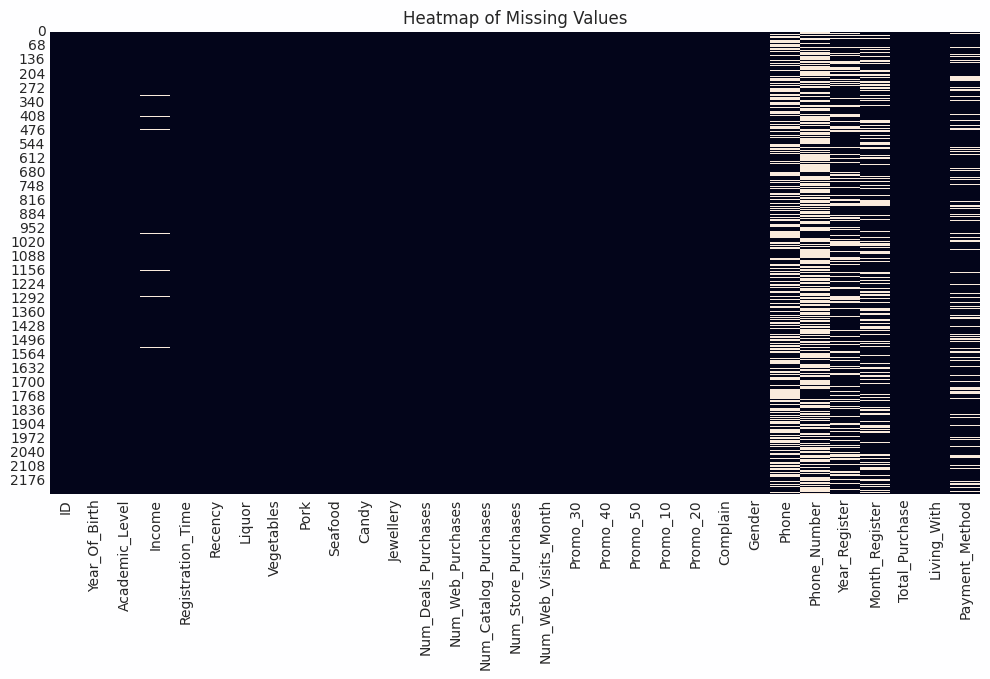

In [29]:
#Using heatmap to visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Heatmap of Missing Values")
plt.show()

There are many missing values in columns: Phone, Phone_Number, Year_Register, Month_Register and Payment_Method

#### 1.2.2.1. Phone and Phone_Number

From matrix, we can see that the null values can be solved by merging those two columns

In [30]:
# Function replace Phone missing values by Phone_Number existing values in each row, and vice versa. If values of both columns (in each row) exist, compare them and return
def create_new_column(row):
    if pd.isna(row['Phone_Number']):
        return row['Phone']
    elif pd.isna(row['Phone']):
        return row['Phone_Number']
    elif row['Phone'] == row['Phone_Number']:
        return row['Phone']
    else:
        return row['Phone_Number']  # Can be modify

# Apply for final_df
df['Fixed_Phone'] = df.apply(create_new_column, axis=1)

In [31]:
# Function format phone number
def format_phone_number(phone):
    if pd.isna(phone):
        return phone
    phone_str = str(phone)
    return f"(+84) {phone_str[2:5]}{phone_str[5:]}"

# Apply for 'Fixed_Phone'
df['Fixed_Phone'] = df['Fixed_Phone'].apply(format_phone_number)

In [32]:
df = df.drop(axis=1, columns=['Phone', 'Phone_Number'])

In [33]:
df = df.rename(columns={'Fixed_Phone': 'Phone'})
df["Phone"].head(2)

0    (+84) 167329039.0
1    (+84) 908534649.0
Name: Phone, dtype: object

#### 1.2.2.2. Registration_Time, Year_Register, Month_Register

In [34]:
# Check values in Registration_Time, Year_Register, Month_Register
df[['Registration_Time','Year_Register', 'Month_Register']].sample(5)

,Registration_Time,Year_Register,Month_Register
751,08-08-2022,NaN,8.0
861,14-04-2023,2023.0,NaN
406,18-03-2023,NaN,3.0
1502,25-06-2023,NaN,NaN
739,09-06-2022,2022.0,6.0


Year_Register and Month_Register are extracted from Registration_Time, so we drop those two columns.

In [35]:
df = df.drop(axis=1, columns=['Year_Register', 'Month_Register'])

In [36]:
# Check missing values again
missing_values_count = df.isna().sum()
missing_values_count

ID                         0
Year_Of_Birth              0
Academic_Level             0
Income                    24
Registration_Time          0
Recency                    0
Liquor                     0
Vegetables                 0
Pork                       0
Seafood                    0
Candy                      0
Jewellery                  0
Num_Deals_Purchases        0
Num_Web_Purchases          0
Num_Catalog_Purchases      0
Num_Store_Purchases        0
Num_Web_Visits_Month       0
Promo_30                   0
Promo_40                   0
Promo_50                   0
Promo_10                   0
Promo_20                   0
Complain                   0
Gender                     0
Total_Purchase             0
Living_With                0
Payment_Method           446
Phone                      0
dtype: int64

There are only 24 missing values in Income column, we replace those by mean of Income. 

In [37]:
# Calculate average income value
avg_income = np.mean(df['Income'])

# Fill missing values in Income column by the average income value
df['Income'] = df['Income'].fillna(avg_income)

#### 1.2.2.3 Payment method
There are many missing values in Payment_Method, it may be caused by losing information when collecting. So that, we change those values to 'unknown'.

In [38]:
# Check values of Payemnt_Method column
df['Payment_Method'].value_counts()

Payment_Method
Online    494
Mobile    441
Card      436
Cash      423
Name: count, dtype: int64

In [39]:
# Replace 'nan' by 'Unknown'
df['Payment_Method'] = df['Payment_Method'].fillna('Unknown')

### 1.1.3. Check Data type

In [40]:
# Check data type
df.dtypes

ID                         int64
Year_Of_Birth            float64
Academic_Level            object
Income                   float64
Registration_Time         object
Recency                  float64
Liquor                   float64
Vegetables               float64
Pork                     float64
Seafood                  float64
Candy                    float64
Jewellery                float64
Num_Deals_Purchases      float64
Num_Web_Purchases        float64
Num_Catalog_Purchases    float64
Num_Store_Purchases      float64
Num_Web_Visits_Month     float64
Promo_30                 float64
Promo_40                 float64
Promo_50                 float64
Promo_10                 float64
Promo_20                 float64
Complain                 float64
Gender                    object
Total_Purchase           float64
Living_With               object
Payment_Method            object
Phone                     object
dtype: object

Config data types

In [41]:
# Change Registration_Time data type to datetime
df["Registration_Time"] = pd.to_datetime(df["Registration_Time"])

# String variables
str_columns = ['Academic_Level','Gender','Payment_Method', 'Phone']
# Change data type to string
for i in str_columns:
  df[i] = df[i].astype(str)

# Int variables
int_columns= ['Year_Of_Birth','Recency', 'Num_Deals_Purchases', 'Num_Web_Purchases','Num_Catalog_Purchases', 'Num_Store_Purchases', 'Num_Web_Visits_Month','Promo_30', 'Promo_40', 'Promo_50', 'Promo_10', 'Promo_20', 'Complain', 'Total_Purchase']
# Change data type to int
for i in int_columns:
  df[i] = df[i].astype(int)

### 1.1.4. Checking outliers

In [42]:
# Create total expense column
df['Total_Expense'] = df[['Liquor','Vegetables','Pork','Seafood','Candy','Jewellery']].sum(axis=1)

In [43]:
# Create a list of categorical columns
categorical_columns = ['ID', 'Year_Of_Birth', 'Academic_Level','Registration_Time','Promo_30', 'Promo_40', 'Promo_50', 'Promo_10', 'Promo_20', 'Complain','Gender', 'Living_With', 'Payment_Method', 'Phone']

In [44]:
# Create a list of continuous columns
continuous_columns = df.drop(axis=1, columns=categorical_columns).columns

In [45]:
continuous_columns

Index(['Income', 'Recency', 'Liquor', 'Vegetables', 'Pork', 'Seafood', 'Candy',
       'Jewellery', 'Num_Deals_Purchases', 'Num_Web_Purchases',
       'Num_Catalog_Purchases', 'Num_Store_Purchases', 'Num_Web_Visits_Month',
       'Total_Purchase', 'Total_Expense'],
      dtype='object')

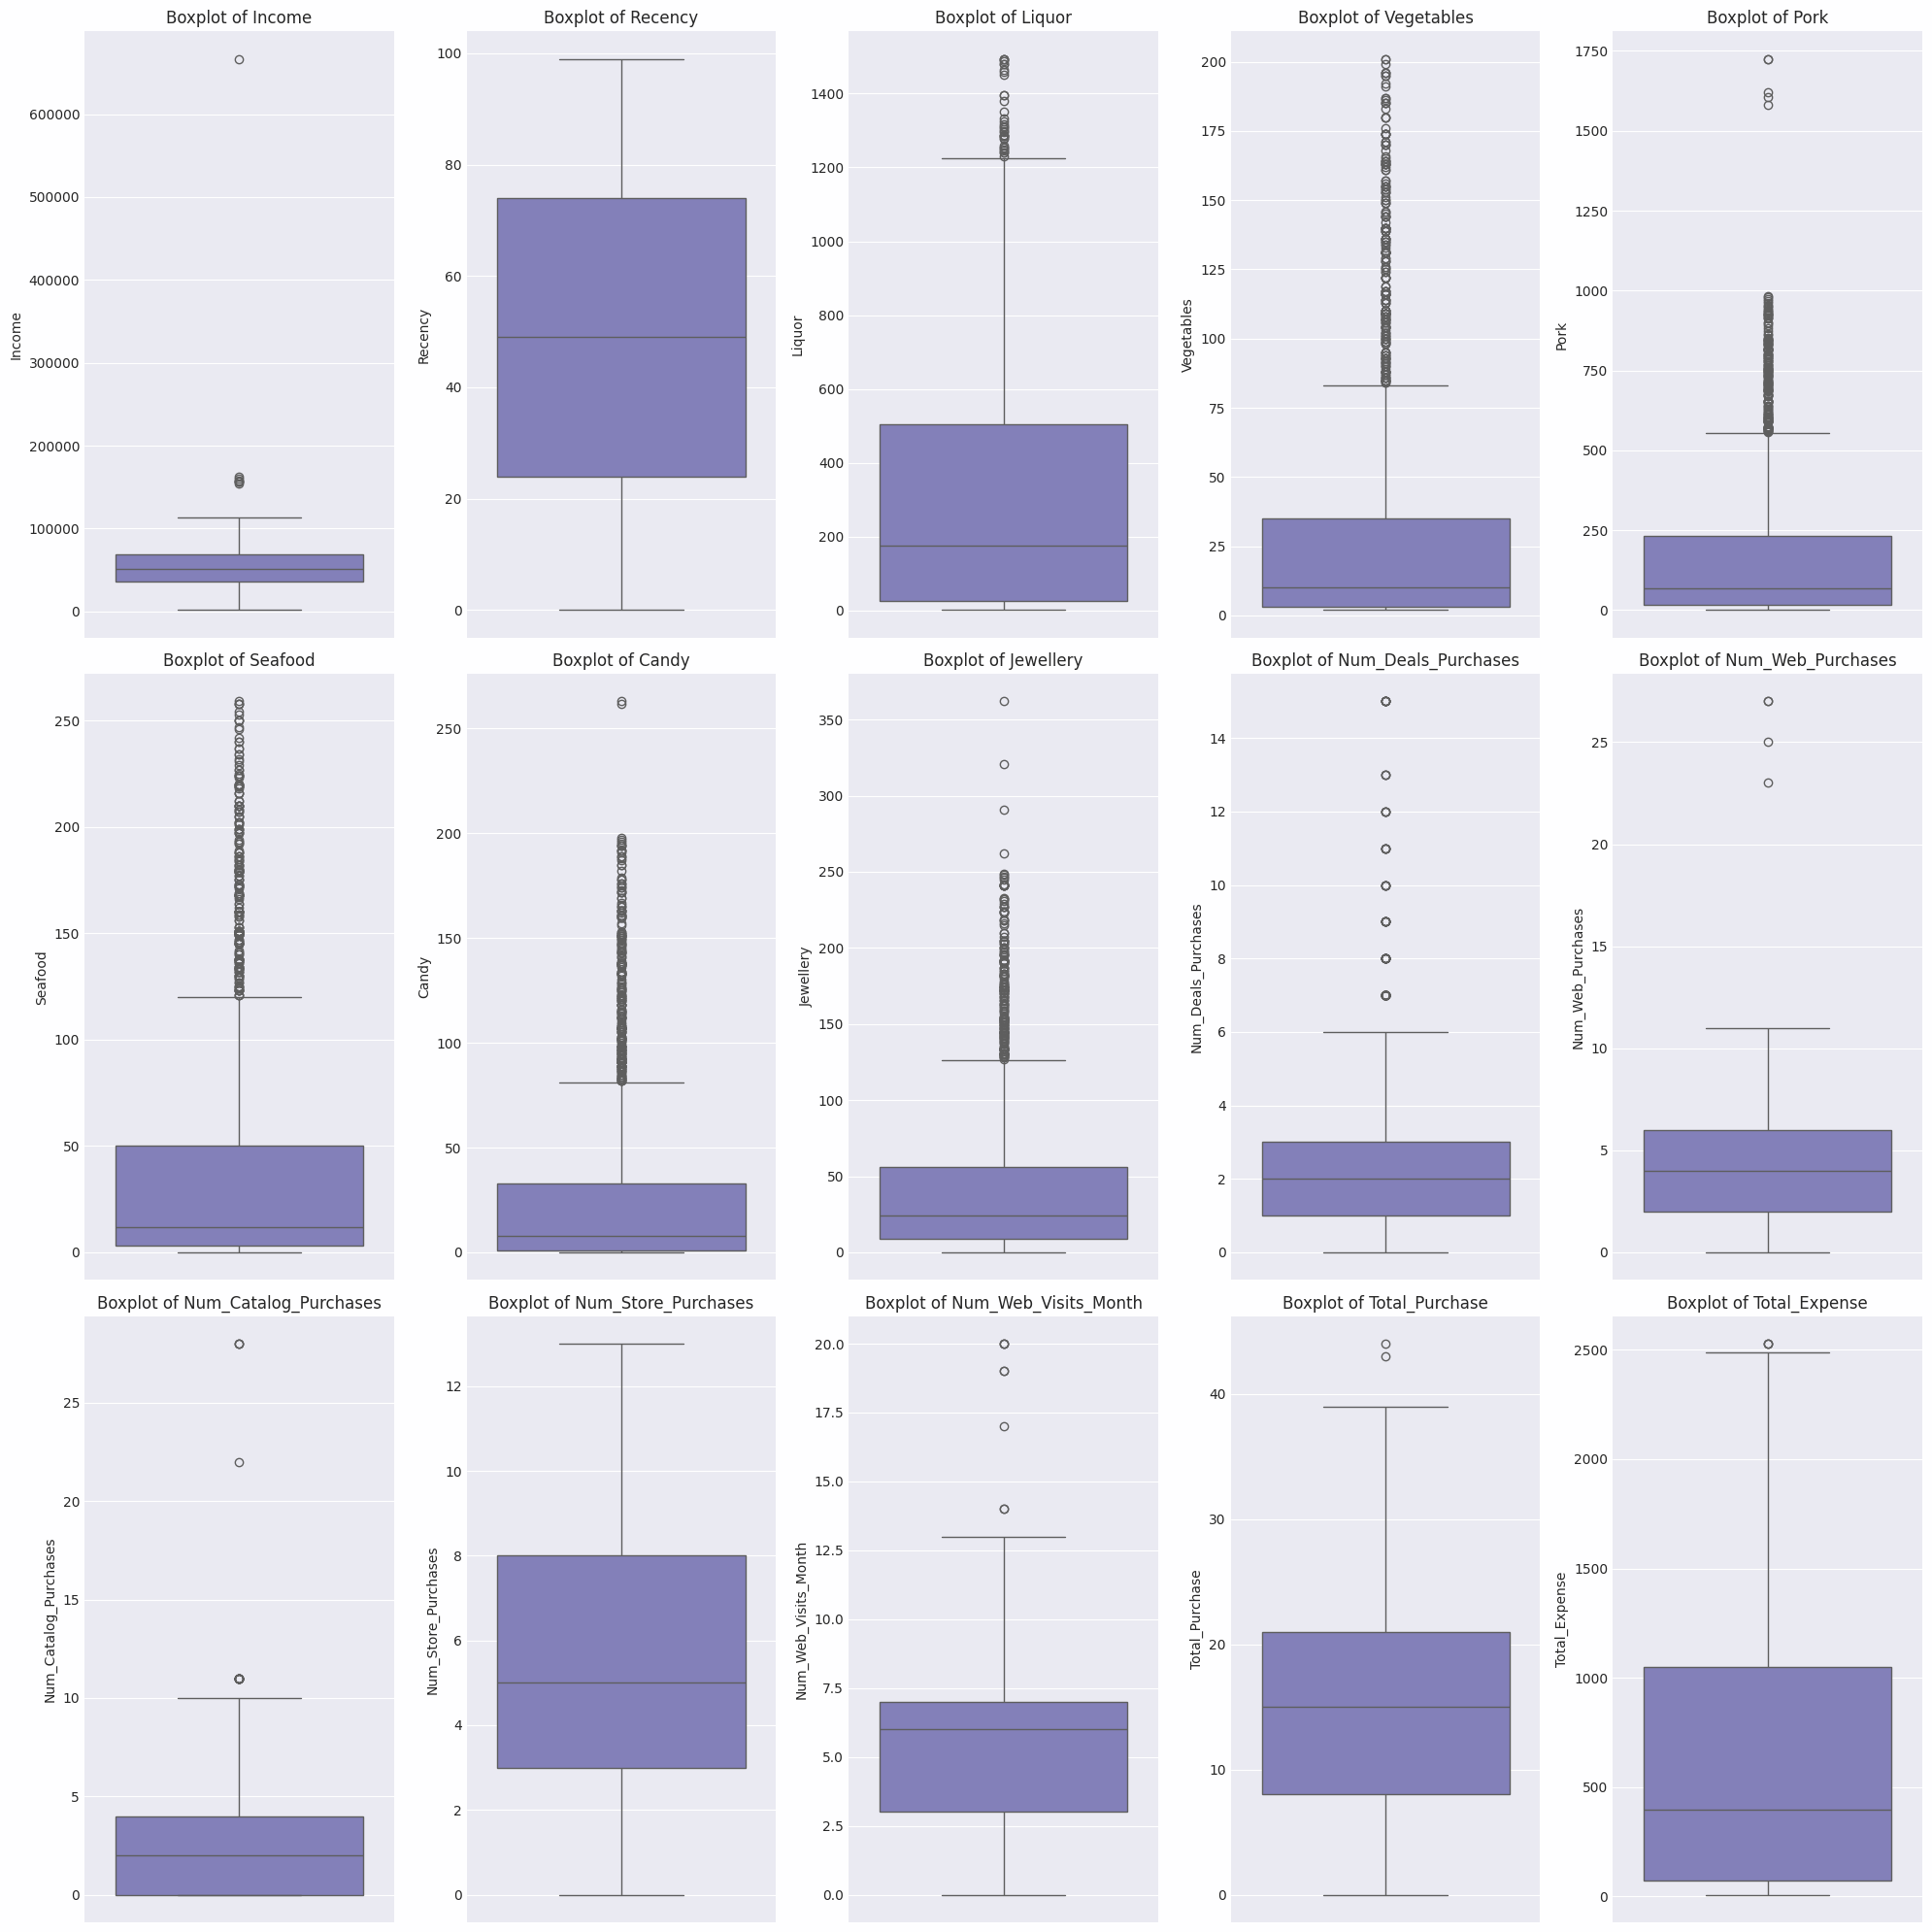

In [46]:
# Create a canvas with 4 columns and 4 rows
fig, axes = plt.subplots(3, 5, figsize=(20, 20))

# Draw boxplot on the canvas
for i, ax in enumerate(axes.flatten()):
    if i < len(continuous_columns):
        sns.boxplot(y=continuous_columns[i], data=df, ax=ax)
        ax.set_title(f'Boxplot of {continuous_columns[i]}')
        ax.set_ylabel(continuous_columns[i])
    else:
        ax.axis('off')

# Fit layout
plt.tight_layout()

plt.show()

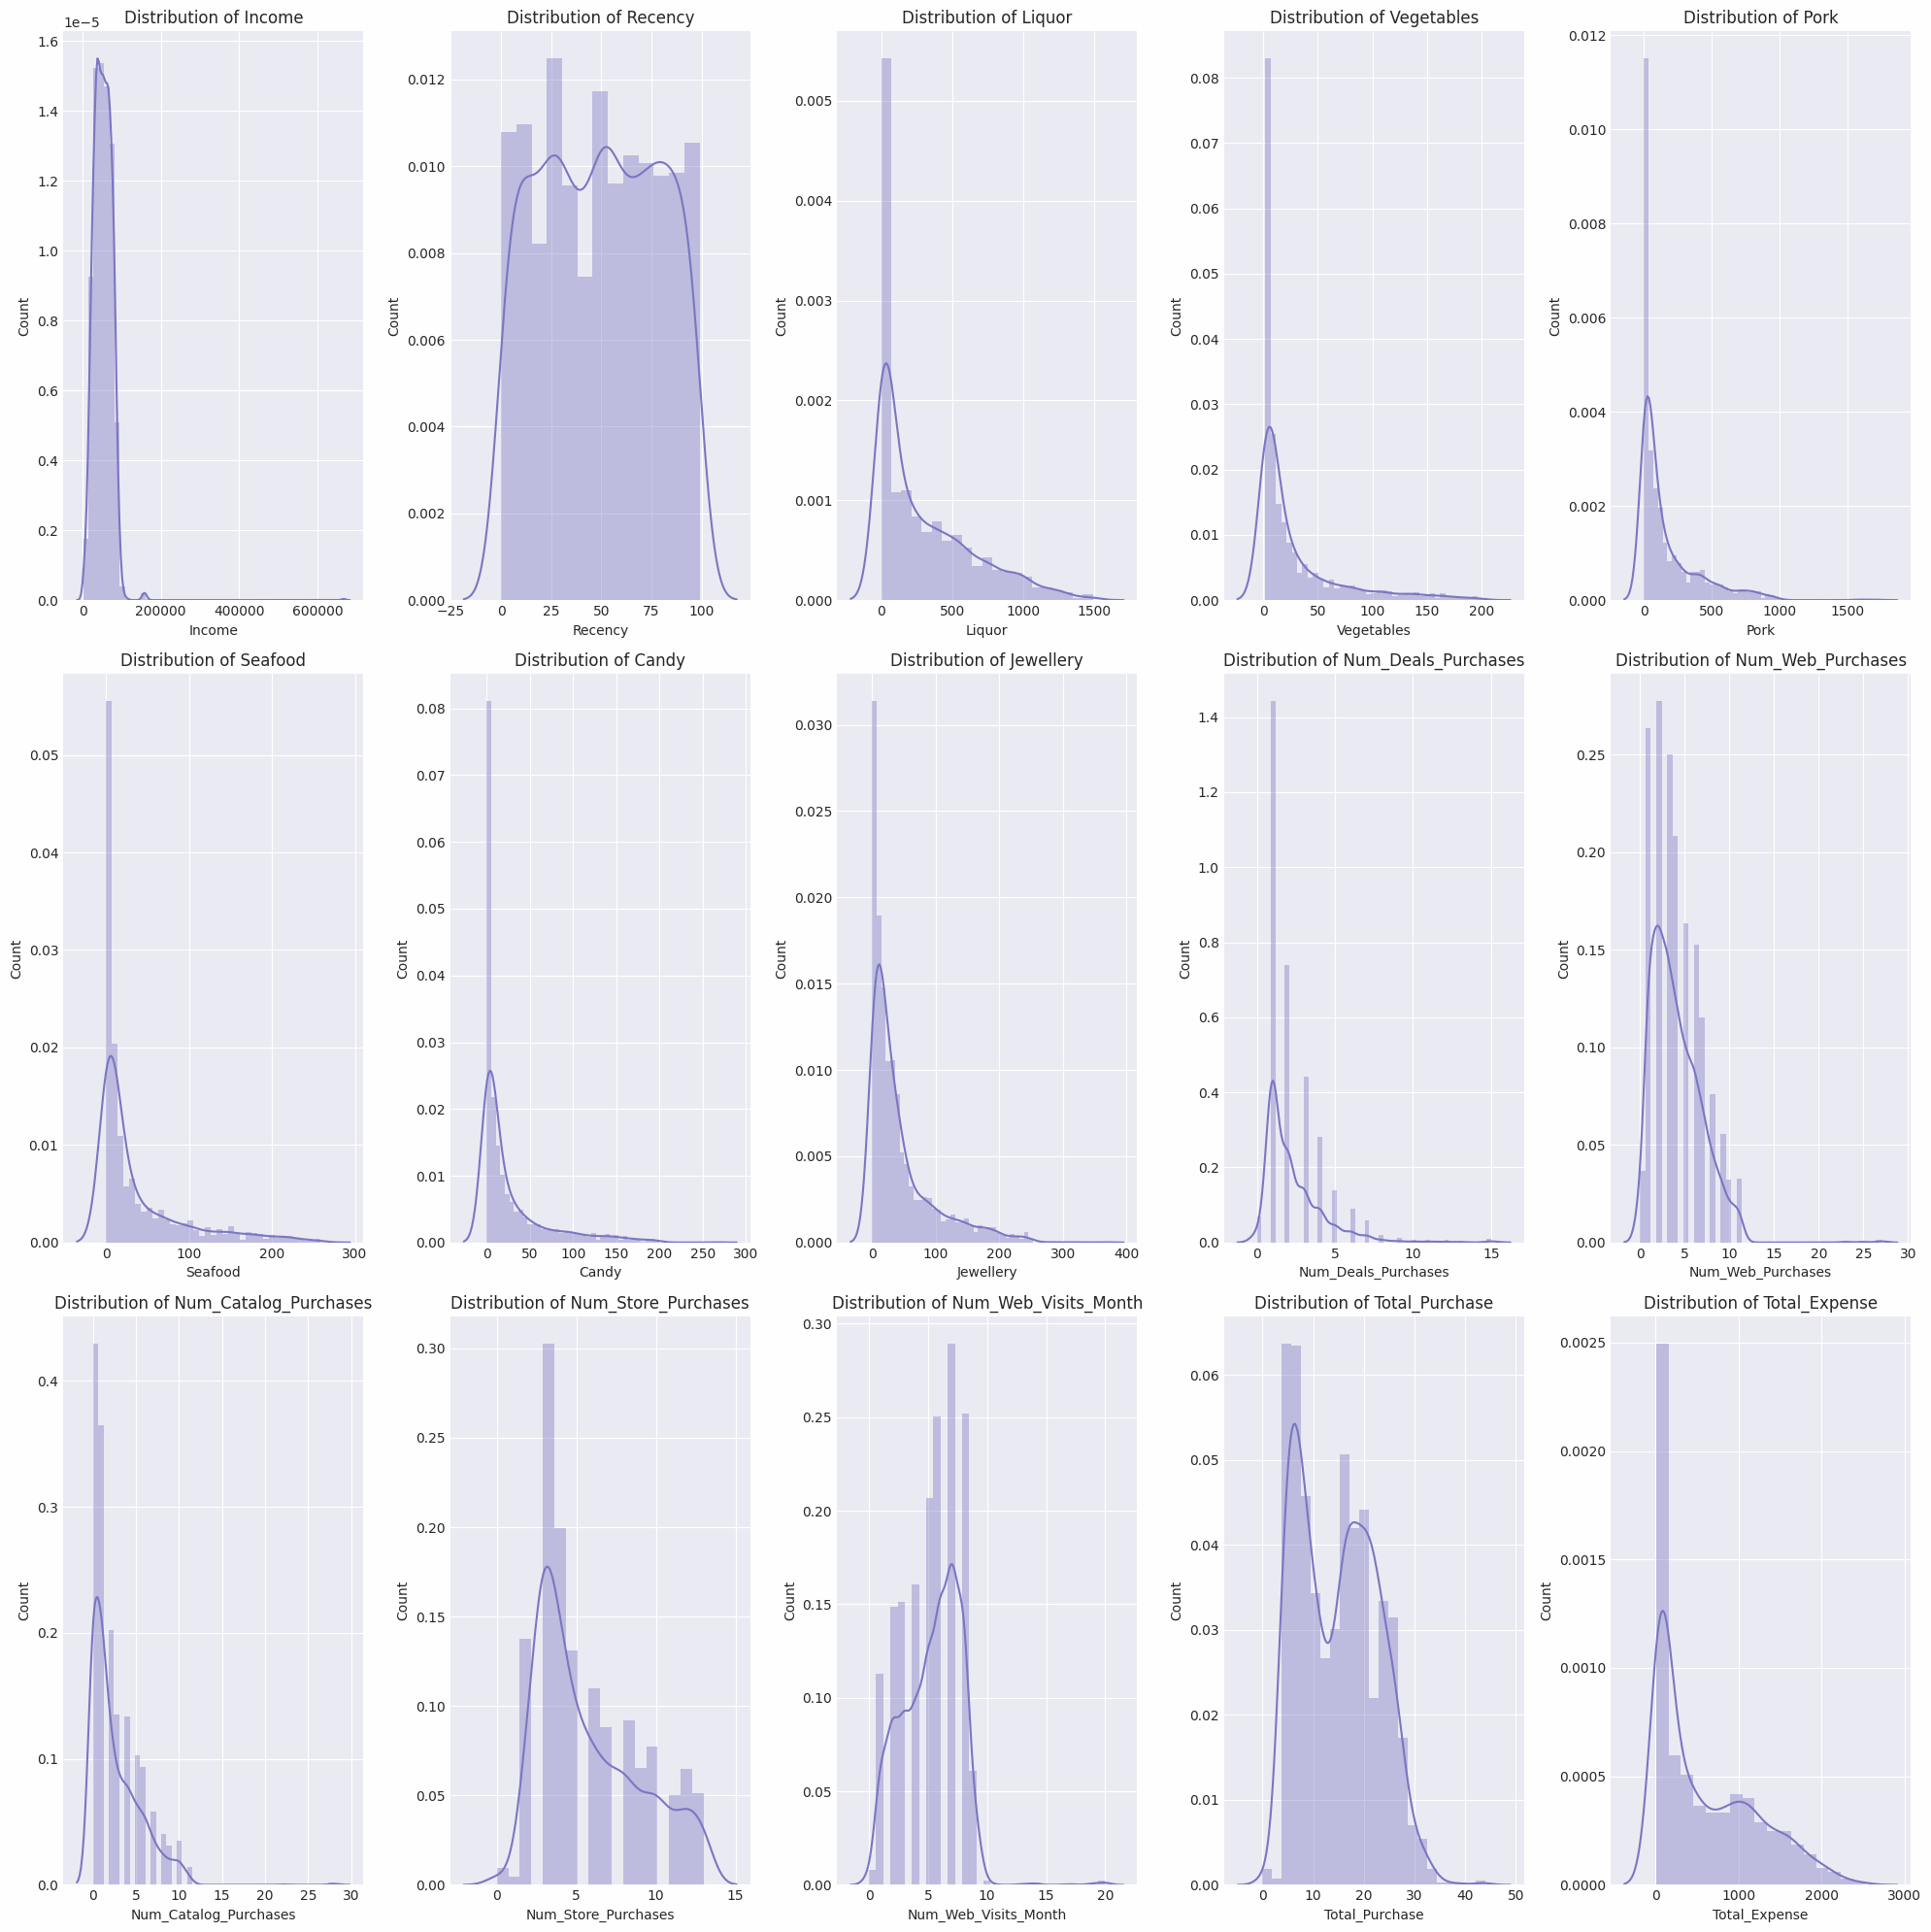

In [47]:
# Create a canvas with 4 rows and 4 columns
fig, axes = plt.subplots(3, 5, figsize=(20, 20))

# Draw distribution plot
for i, ax in enumerate(axes.flatten()):
    if i < len(continuous_columns):
        sns.distplot(df[continuous_columns[i]], ax=ax)
        ax.set_title(f'Distribution of {continuous_columns[i]}')
        ax.set_xlabel(continuous_columns[i])
        ax.set_ylabel('Count')
    else:
        ax.axis('off')

# Adjust layout
plt.tight_layout()

plt.show()

Point out outliers by IQR method

In [48]:
# Create a dictionary to store outliers for each column
outlier_dict = {}

# Columns of the DataFrame 'outlier'
outlier_columns = ['Income', 'Recency', 'Total_Purchase', 'Total_Expense']

# Iterate through columns to identify outliers and add them to the 'outlier_dict'
for column in outlier_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Get the list of outlier values for the column
    outliers = df[((df[column] < lower_bound) | (df[column] > upper_bound))][column].values
    outlier_dict[column] = outliers 

In [49]:
# Dictionary to store DataFrames of columns with outliers
outlier_dfs = {}

for column in outlier_dict:
    column_outliers = outlier_dict[column]
    if len(column_outliers) > 0:  # Check if the column has outliers
        unique_outliers = np.unique(column_outliers)  # Remove duplicate values
        sorted_outliers = np.sort(unique_outliers, axis=None)[::-1]  # Sort unique outliers in descending order
        outlier_df = pd.DataFrame(sorted_outliers, columns=[column])  # Create a DataFrame for the column with outliers
        outlier_dfs[column] = outlier_df  # Save the DataFrame into the dictionary

In [50]:
from tabulate import tabulate

# Use tabulate to present the DataFrames horizontally without modifying the original DataFrame
for column, df_outlier in outlier_dfs.items():
    print(f"{'-'*5} {column} {'-'*5}")
    print(tabulate(df_outlier.copy(), headers='keys', tablefmt='fancy_grid'))
    print()  # Add an empty line between DataFrames


----- Income -----
╒════╤══════════╕
│    │   Income │
╞════╪══════════╡
│  0 │   666666 │
├────┼──────────┤
│  1 │   162397 │
├────┼──────────┤
│  2 │   160803 │
├────┼──────────┤
│  3 │   157733 │
├────┼──────────┤
│  4 │   157243 │
├────┼──────────┤
│  5 │   157146 │
├────┼──────────┤
│  6 │   156924 │
├────┼──────────┤
│  7 │   153924 │
╘════╧══════════╛

----- Total_Purchase -----
╒════╤══════════════════╕
│    │   Total_Purchase │
╞════╪══════════════════╡
│  0 │               44 │
├────┼──────────────────┤
│  1 │               43 │
╘════╧══════════════════╛

----- Total_Expense -----
╒════╤═════════════════╕
│    │   Total_Expense │
╞════╪═════════════════╡
│  0 │            2528 │
├────┼─────────────────┤
│  1 │            2527 │
╘════╧═════════════════╛



In [51]:
df = df[~df['Total_Expense'].isin([2528,2527])]

In [52]:
df = df[~df['Income'].isin([666666, 162397, 160803, 157733, 157243, 157146, 156924, 153924])]

In [53]:
df = df[~df['Total_Purchase'].isin([44, 43])]

In [54]:
df.describe()

,ID,Year_Of_Birth,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,Candy,...,Num_Store_Purchases,Num_Web_Visits_Month,Promo_30,Promo_40,Promo_50,Promo_10,Promo_20,Complain,Total_Purchase,Total_Expense
count,2228.000000,2228.000000,2228.000000,2228,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,...,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000
mean,5484.981149,1987.929533,51611.133318,2022-07-10 07:29:11.526032384,49.126571,304.874327,28.242370,163.654847,37.583932,27.008079,...,5.805206,5.337971,0.072711,-0.639138,0.013465,0.064183,0.013465,0.009425,14.838420,605.507630
min,1001.000000,1975.000000,1730.000000,2021-07-30 00:00:00,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,3250.750000,1985.000000,35434.750000,2022-01-16 00:00:00,24.000000,25.000000,4.000000,16.000000,3.000000,1.000000,...,3.000000,3.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,72.000000
50%,5505.500000,1988.000000,51550.000000,2022-07-08 12:00:00,49.500000,176.500000,10.000000,67.000000,12.000000,8.000000,...,5.000000,6.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,399.000000
75%,7722.500000,1991.000000,68098.250000,2022-12-30 00:00:00,74.000000,505.250000,35.000000,230.000000,50.000000,33.000000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,1043.500000
max,9997.000000,2002.000000,113734.000000,2023-06-29 00:00:00,99.000000,1494.000000,201.000000,1607.000000,259.000000,263.000000,...,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000,2489.000000
std,2593.319455,4.982409,20546.492668,NaN,28.970932,335.448970,39.634597,215.485721,54.692533,41.130401,...,3.239120,2.412036,0.259720,0.536025,0.115281,0.245134,0.115281,0.096648,7.599832,597.366229


Columns: Liquor, Vegetables, Pork, Seafood, Candy, Jewellery, Num_Deals_Purchases, Num_Web_Purchases, Num_Catalog_Purchases, Num_Store_Purchases, Num_Web_Visits_Month change upon customers' behavior, therefore, some high values may be not considered as outliers.

Moreover, the columns Total_Purchase and Total_Expense are the total of elementary columns, so we just can rely on those columns to point out outliers.


Some higher values in Children and Age can not be considered as outliers. Because, they appear as a smaller frequency, so by IQR, they are pointed out as outliers, but it doesn't mean that.
The same for Income column, except the value of 666666, this must be considered as an outlier.

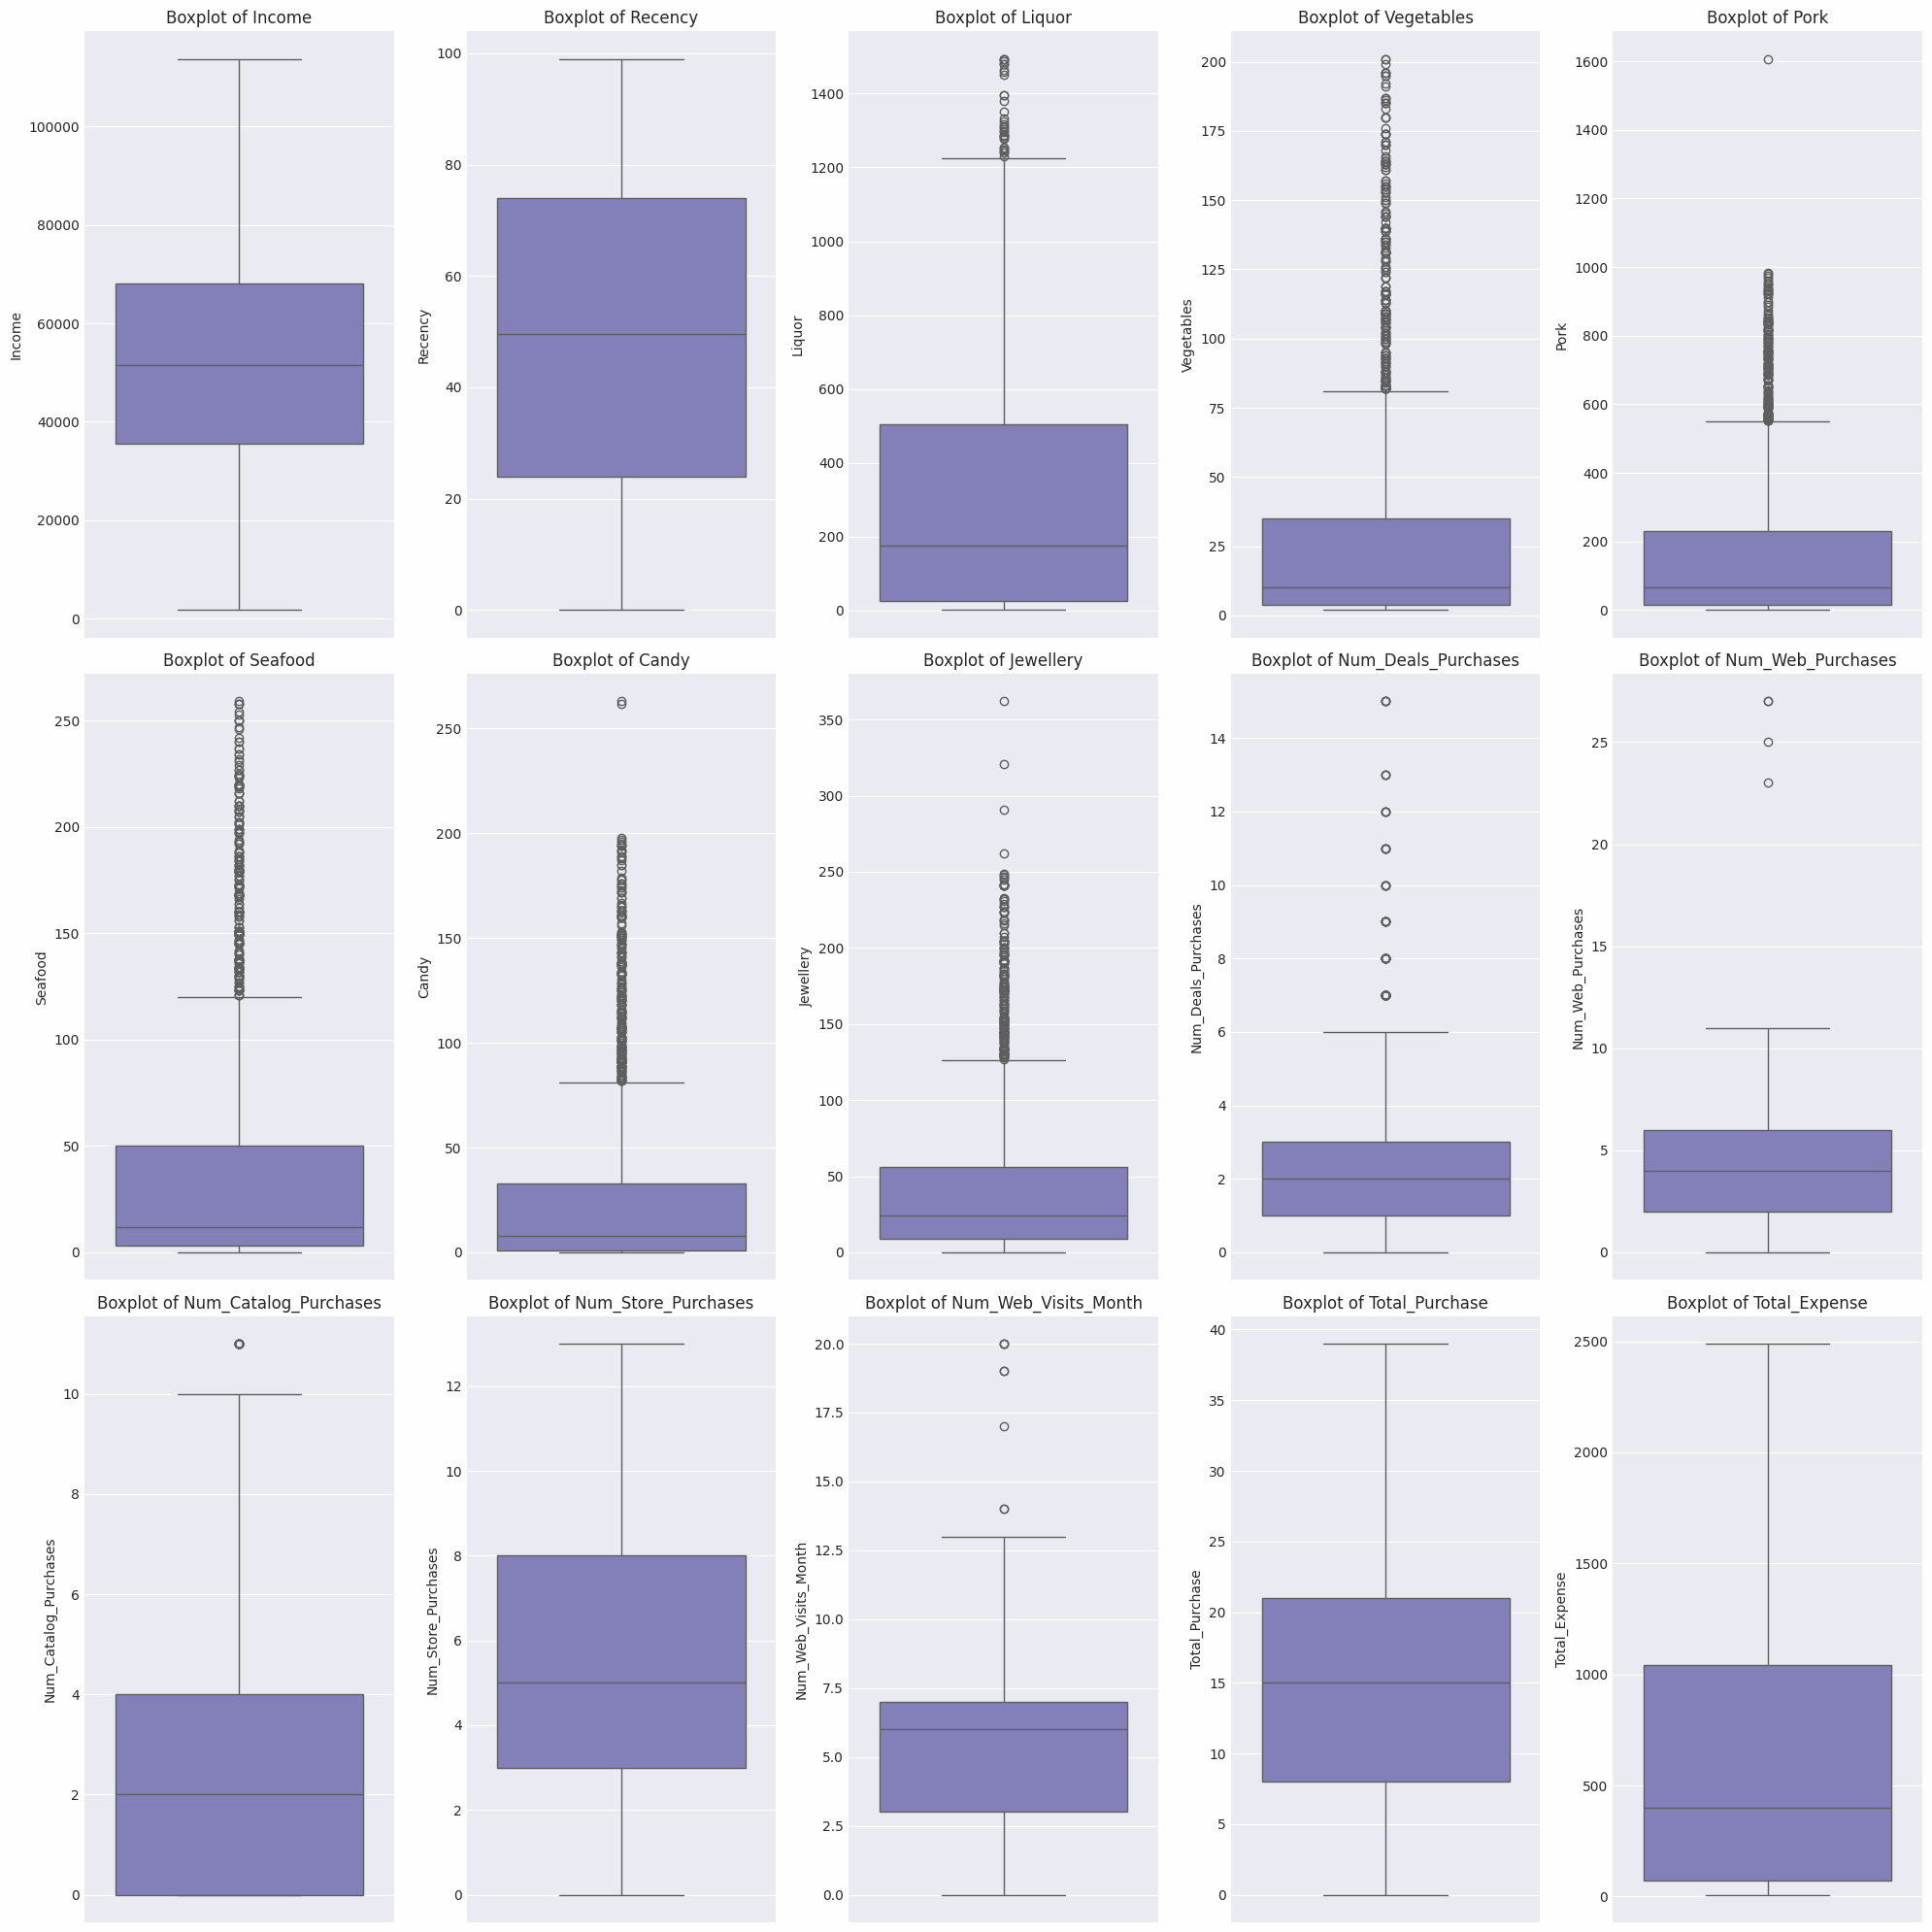

In [55]:
# Create a canvas with 4 columns and 4 rows
fig, axes = plt.subplots(3, 5, figsize=(20, 20))

# Draw boxplot on the canvas
for i, ax in enumerate(axes.flatten()):
    if i < len(continuous_columns):
        sns.boxplot(y=continuous_columns[i], data=df, ax=ax)
        ax.set_title(f'Boxplot of {continuous_columns[i]}')
        ax.set_ylabel(continuous_columns[i])
    else:
        ax.axis('off')

# Fit layout
plt.tight_layout()

plt.show()

### 1.1.5. Error Values

In [56]:
# Check unique values of each Promotion
for column in ['Promo_30', 'Promo_40', 'Promo_50', 'Promo_10', 'Promo_20']:
    unique_values = df[column].unique()
    print(f'Unique values in {column}: {unique_values}')

Unique values in Promo_30: [1 0]
Unique values in Promo_40: [-1  0  1]
Unique values in Promo_50: [0 1]
Unique values in Promo_10: [0 1]
Unique values in Promo_20: [0 1]


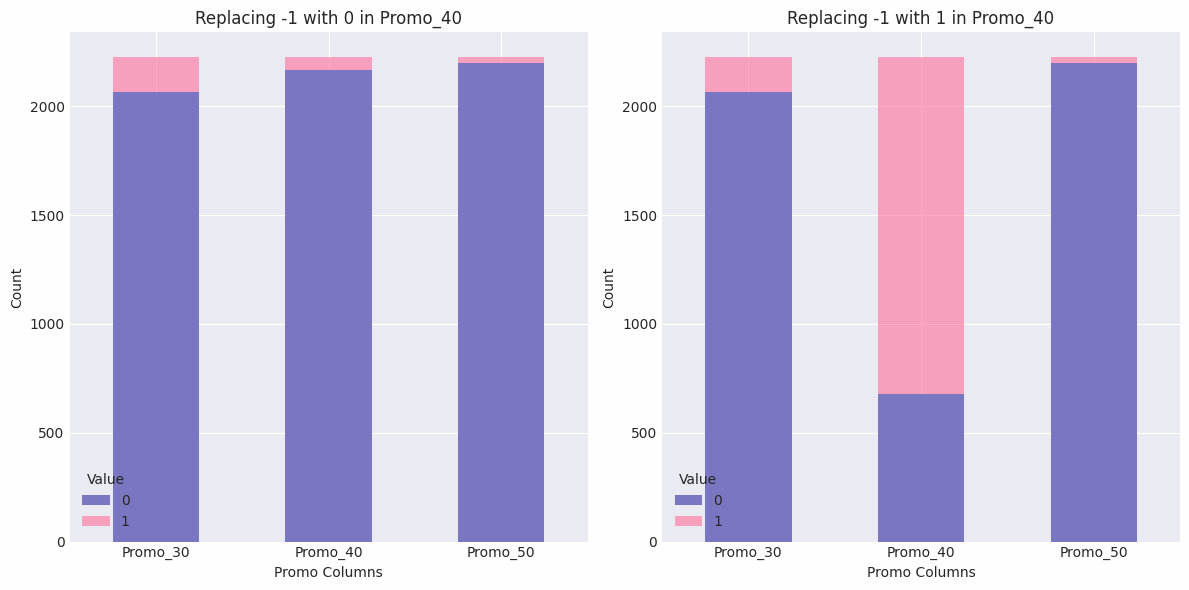

In [57]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Replacing -1 with 0 in a copy of df
df_one = df.copy()  # Make a copy to avoid modifying the original DataFrame
df_one['Promo_40'] = df_one['Promo_40'].replace(-1, 0)
promo_counts_before = df_one[['Promo_30', 'Promo_40', 'Promo_50']].apply(pd.Series.value_counts)
promo_counts_before = promo_counts_before.T
promo_counts_before.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Replacing -1 with 0 in Promo_40')
axes[0].set_xlabel('Promo Columns')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Promo_30', 'Promo_40', 'Promo_50'], rotation=0)
axes[0].legend(title='Value', labels=['0', '1'])

# Replacing -1 with 1 in a copy of df
df_two = df.copy()  # Make a copy to avoid modifying the original DataFrame
df_two['Promo_40'] = df_two['Promo_40'].replace(-1, 1)
promo_counts_after = df_two[['Promo_30', 'Promo_40', 'Promo_50']].apply(pd.Series.value_counts)
promo_counts_after = promo_counts_after.T
promo_counts_after.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Replacing -1 with 1 in Promo_40')
axes[1].set_xlabel('Promo Columns')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(['Promo_30', 'Promo_40', 'Promo_50'], rotation=0)
axes[1].legend(title='Value', labels=['0', '1'])

plt.tight_layout()
plt.show()

We try two ways to solve this problem, replacing -1 with 1 and replacing -1 with 0. We see that by replacing -1 with 0, it seems more appopriately.

In [58]:
df['Promo_40'] = df['Promo_40'].replace(-1, 0)
df['Promo_40'].unique()

array([0, 1])

## 1.2. Data Transformation

### 1.2.1. Columns transformation

#### 1.2.1.1. Create Age column

In [59]:
# Add an Age columns
current_year = 2024

df['Age'] = current_year - df['Year_Of_Birth']

#### 1.2.2.2. Create Marital_Status and Children columns from Living_With column

In [60]:
# Seperate Living_With column into Maritual_Status column and Children column
df[['Marital_Status', 'Children']] = df['Living_With'].str.split('_', expand=True)

df["Children"] = df["Children"].astype(int)

df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Relationship' if x in ['Married', 'Together'] else 'Single')

df = df.drop(axis=1, columns=['Living_With'])

#### 1.2.2.3. Create Family_Size column

In [61]:
# Calcualte family members
df['Family_Size'] = df["Marital_Status"].replace({"Single": 1, "Relationship":2})+ df["Children"]

#### 1.2.2.4. Create Is_Parent column

In [62]:
# Create a column with 1 if there is children, otherwise 0.
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

#### 1.2.2.5. Recategorize Academic_Level

In [63]:
# Re-categorize Academic_Level
df['Academic'] = df['Academic_Level'].apply(lambda x: 'Post_Graduate' if x in ['PhD', 'Master', '2n Cycle'] else 'Graduate' if x == 'Graduation' else 'Under_Graduate')

In [64]:
df = df.drop(axis=1, columns='Academic_Level')
df = df.rename(columns={'Academic': 'Academic_Level'})

#### 1.2.2.6. Create Customer_For column

In [65]:
# Customer_For is calculated by nearest recorded date minus registration date
max_date = df['Registration_Time'].max()

days = []

for i in df['Registration_Time']:
  delta = max_date - i
  days.append(delta)

df['Customer_For'] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

#### 1.2.2.7. Create Promo_Response column

In [66]:
df['Promo_Response'] = df['Promo_10'] + df['Promo_20'] + df['Promo_30'] + df['Promo_40'] + df['Promo_50']

------------------------

# II. EDA and Visualization

## 2.1. Distribution Overview

Create overall distribution of continuous variables

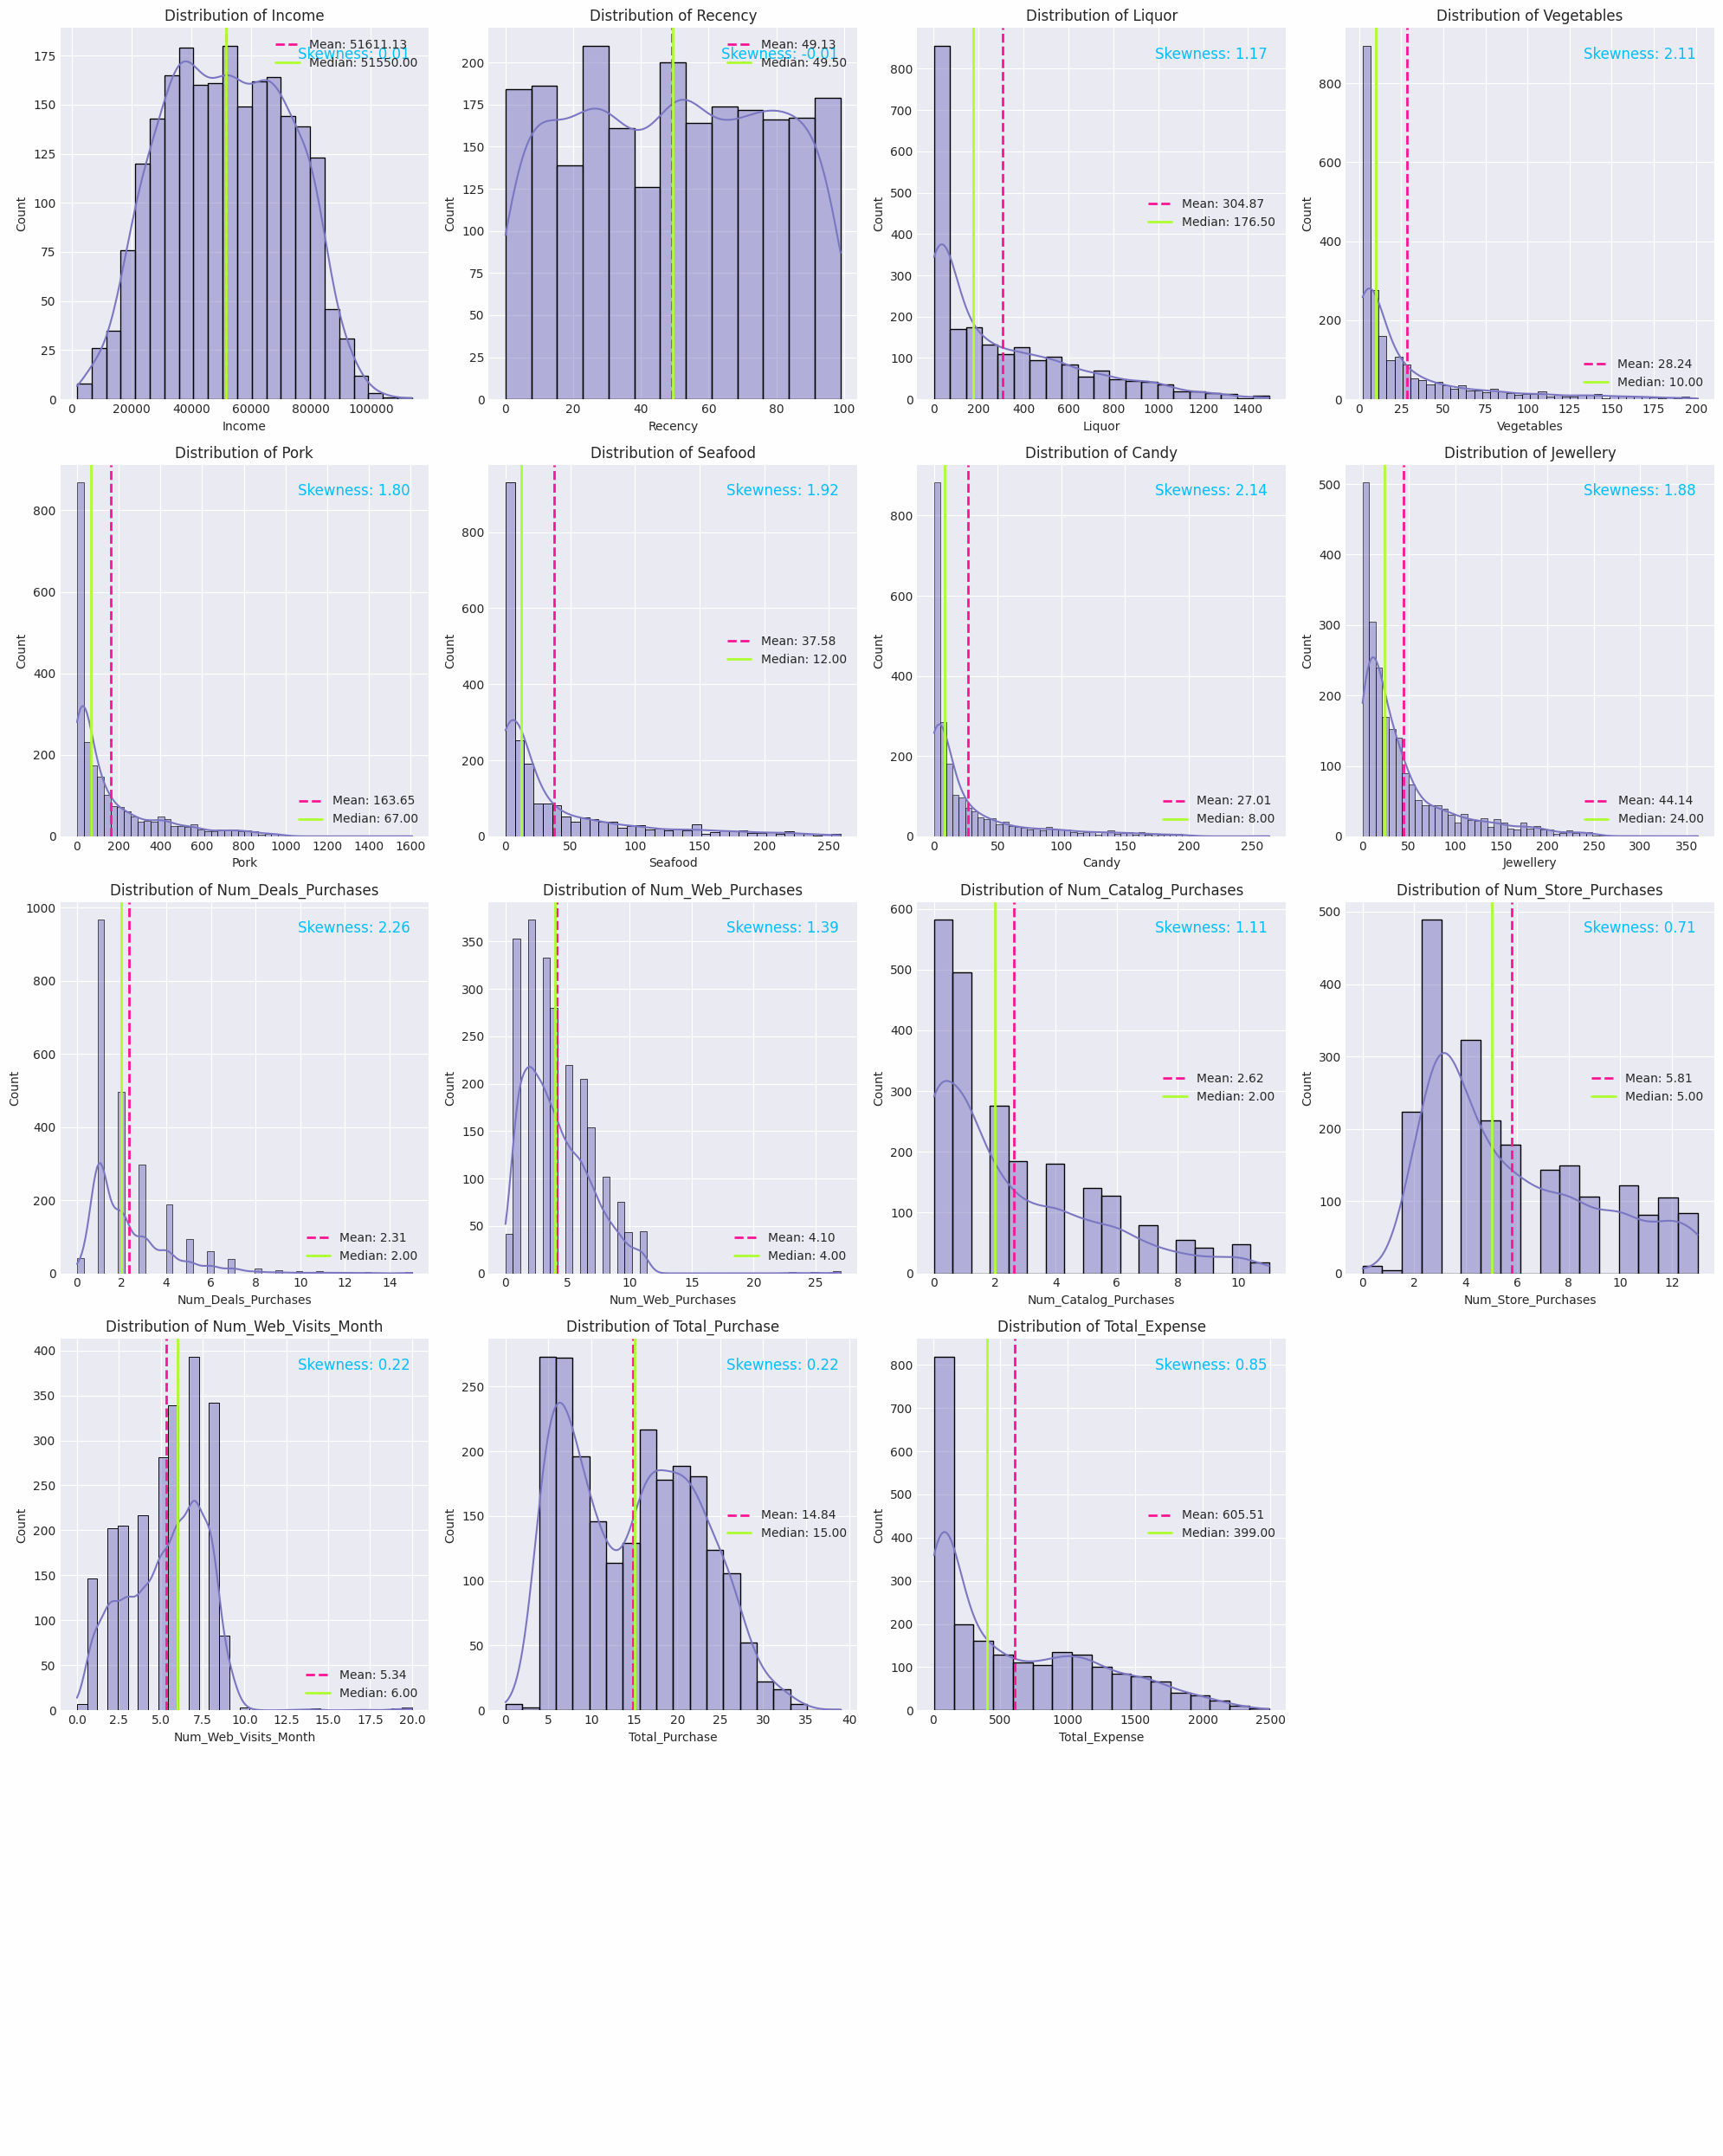

In [67]:
# Create a canvas with 5 rows and 4 columns
fig, axes = plt.subplots(5, 4, figsize=(20, 25))

# Draw distribution plot with mean, median, and skew rate
for i, ax in enumerate(axes.flatten()):
    if i < len(continuous_columns):
        column = continuous_columns[i]
        sns.histplot(df[column], kde=True, ax=ax)
        mean = df[column].mean()
        median = df[column].median()
        skewness = df[column].skew()
        
        # Plot mean and median lines
        ax.axvline(mean, color='deeppink', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
        ax.axvline(median, color='greenyellow', linestyle='-', linewidth=2, label=f'Median: {median:.2f}')
        
        # Add text for skewness
        ax.text(0.95, 0.95, f'Skewness: {skewness:.2f}', verticalalignment='top', horizontalalignment='right', 
                transform=ax.transAxes, color='deepskyblue', fontsize=12)
        
        # Set titles and labels
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.legend()
    else:
        ax.axis('off')

# Adjust layout
plt.tight_layout()

plt.show()

## 2.2. Univariate Analysis

### 2.2.1. Demographic variables

#### 2.2.1.1. Marital Status

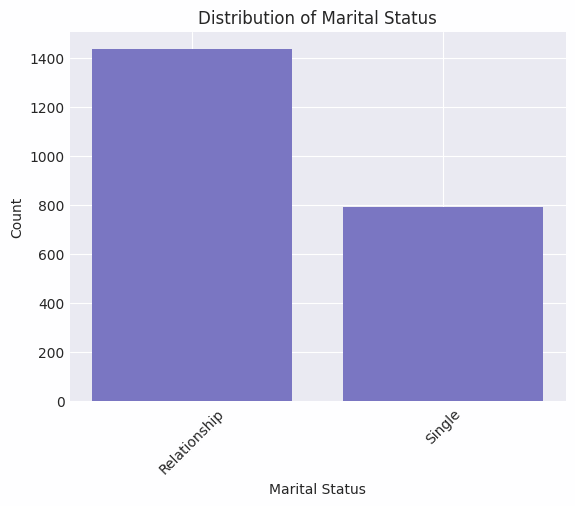

In [68]:
# Assuming df['Marital_Status'] contains categorical data
marital_status_counts = df['Marital_Status'].value_counts()

plt.bar(marital_status_counts.index, marital_status_counts.values)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed

plt.show()

#### 2.2.1.2. Age

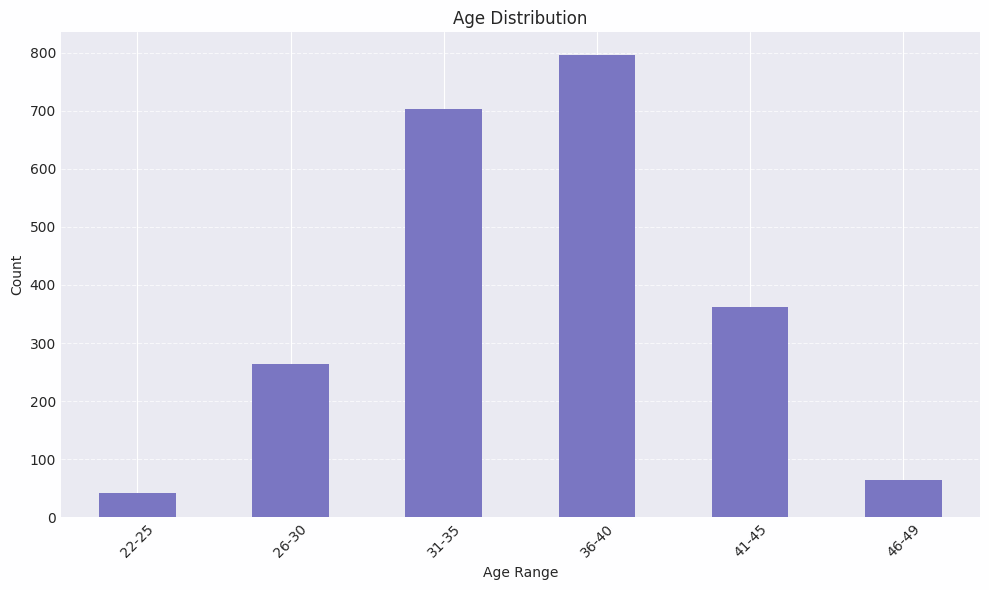

In [69]:
age_ranges = {
    '22-25': (22, 25),
    '26-30': (26, 30),
    '31-35': (31, 35),
    '36-40': (36, 40),
    '41-45': (41, 45),
    '46-49': (46, 49)
}

# Function to assign age range
def assign_age_range(age):
    for age_range, range_ in age_ranges.items():
        if range_[0] <= age <= range_[1]:
            return age_range
    return 'Unknown'


# Count occurrences of each age range
age_range_counts =df['Age'].apply(assign_age_range).value_counts()

# Sort the age ranges based on their natural order
age_range_counts = age_range_counts.sort_index()

# Plotting
plt.figure(figsize=(10, 6))
age_range_counts.plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 2.2.1.3. Gender

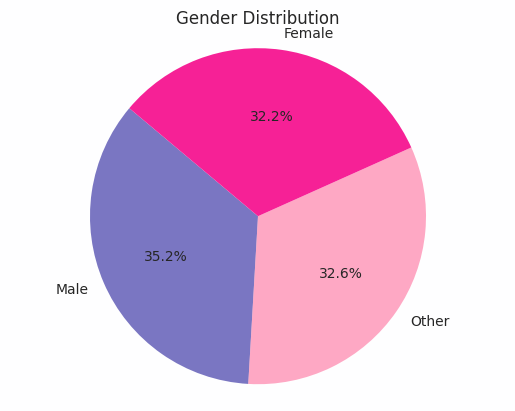

In [70]:
# Assuming df['Gender'] contains categorical data
gender_counts = df['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### 2.2.1.4. Academic Level

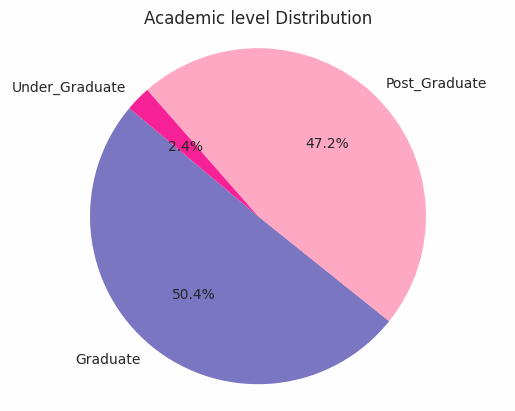

In [71]:
# Assuming df['Gender'] contains categorical data
gender_counts = df['Academic_Level'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Academic level Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### 2.2.1.5. Children

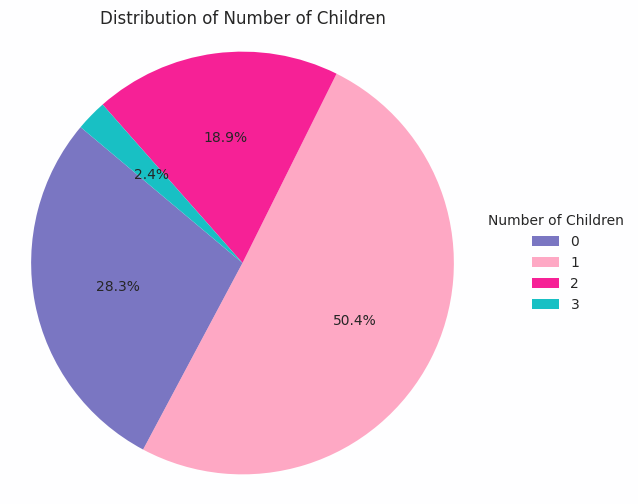

In [72]:
# Assuming df['Children'] contains categorical data
children_counts = df['Children'].value_counts().sort_index()

# Create a pie chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(children_counts.values, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Number of Children')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add legend
plt.legend(wedges, children_counts.index.astype(str), title="Number of Children", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

#### 2.2.1.6. Income

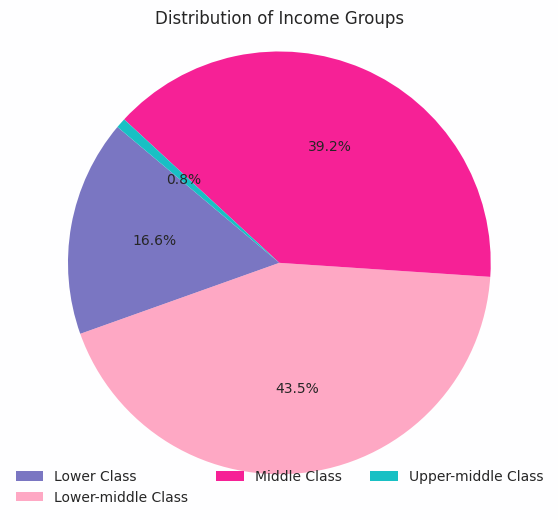

In [73]:
def classify_income(income):
    if income > 153000:
        return 'Upper Class'
    elif income > 94001:
        return 'Upper-middle Class'
    elif income > 58021:
        return 'Middle Class'
    elif income > 30000:
        return 'Lower-middle Class'
    else:
        return 'Lower Class'

# Counting income groups
income_group_counts = df['Income'].apply(lambda x: classify_income(x)).value_counts().sort_index()

# Plotting pie chart
plt.figure(figsize=(6, 6))
plt.pie(income_group_counts, startangle=140, autopct='%1.1f%%')
plt.title('Distribution of Income Groups')

# Legend
plt.legend(labels=income_group_counts.index, loc="lower center", bbox_to_anchor=(0.5, -0.05), ncol=3)

# Ensure the chart is circular
plt.axis('equal')  

# Show the chart
plt.show() 

### 2.2.2. Shopping Behavior Variables

#### 2.2.2.1. Purchasing Channels

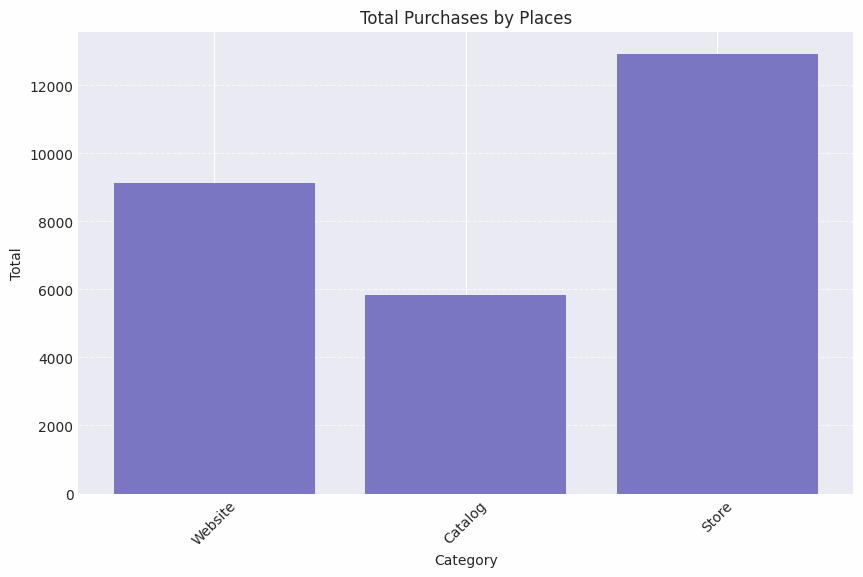

In [74]:
# Creating a copy of the DataFrame and renaming the columns in the copy
df_copy = df.copy()
df_copy.rename(columns={'Num_Web_Purchases': 'Website', 'Num_Catalog_Purchases': 'Catalog', 'Num_Store_Purchases': 'Store'}, inplace=True)

# Calculating totals for each column in the copied DataFrame
place_totals = df_copy[['Website', 'Catalog', 'Store']].sum()

# Categories and their corresponding totals
categories = place_totals.index
totals_values = place_totals.values

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, totals_values)
plt.title('Total Purchases by Places')
plt.xlabel('Category')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 2.2.2.2. Registration Time

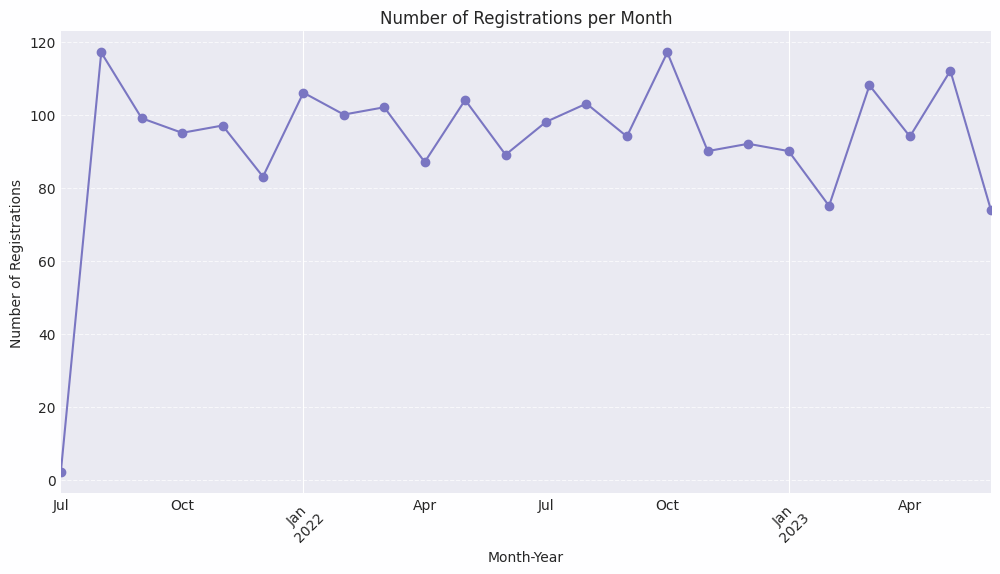

In [75]:
# Make a copy of the DataFrame to keep the original unchanged
df_copy = df.copy()

# Convert the Registration_Time column from string to datetime format
df_copy['Registration_Time'] = pd.to_datetime(df_copy['Registration_Time'], format='%d-%m-%Y')

# Extract the month and year from the Registration_Time column
df_copy['Month_Year'] = df_copy['Registration_Time'].dt.to_period('M')

# Group the data by month-year and count the number of registrations per month-year
registrations_per_month_year = df_copy.groupby('Month_Year').size()

# Plot the number of registrations per month-year as a line chart
plt.figure(figsize=(12, 6))
registrations_per_month_year.plot(kind='line', marker='o',linestyle='-')
plt.title('Number of Registrations per Month')
plt.xlabel('Month-Year')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 2.2.2.3. Promotion Acceptance

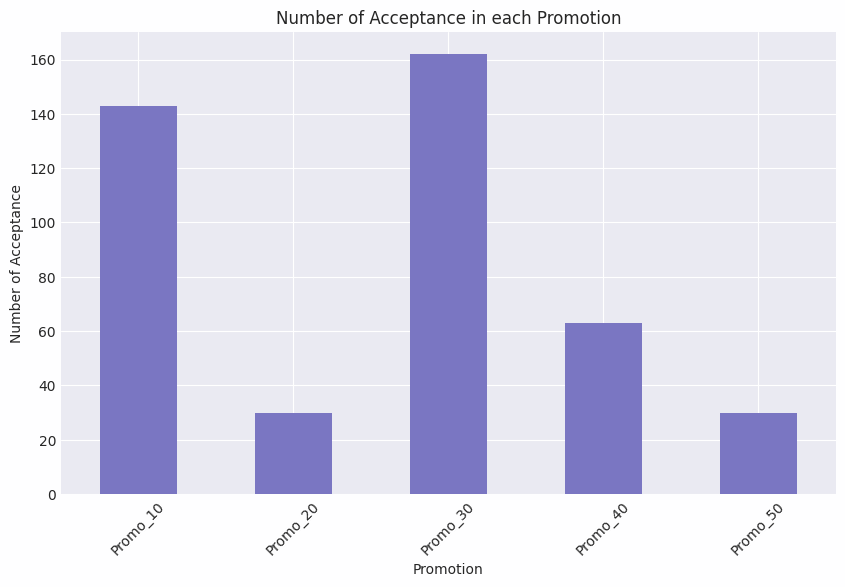

In [76]:
# Count occurrences of '1' for each promotion
promo_counts = df[['Promo_10', 'Promo_20', 'Promo_30', 'Promo_40', 'Promo_50']].sum()

# Create bar chart
plt.figure(figsize=(10, 6))
promo_counts.plot(kind='bar')
plt.title("Number of Acceptance in each Promotion")
plt.xlabel("Promotion")
plt.ylabel("Number of Acceptance")
plt.xticks(rotation=45)
plt.show()

#### 2.2.2.4. Complain

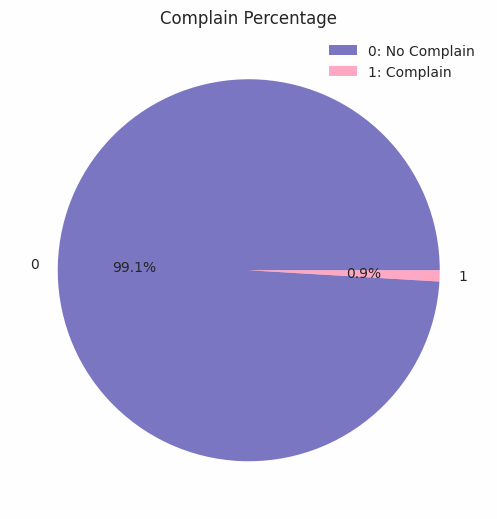

In [77]:
# Calculate percentage of each value
complain_counts = df['Complain'].value_counts(normalize=True) * 100

# Draw plot
plt.figure(figsize=(10, 8))

# Draw piechart
plt.subplot(1, 2, 2)
plt.pie(complain_counts, labels=complain_counts.index, autopct='%1.1f%%')
plt.title('Complain Percentage')
plt.legend(['0: No Complain', '1: Complain'])

plt.tight_layout()
plt.show()

#### 2.2.2.5. Payment Method

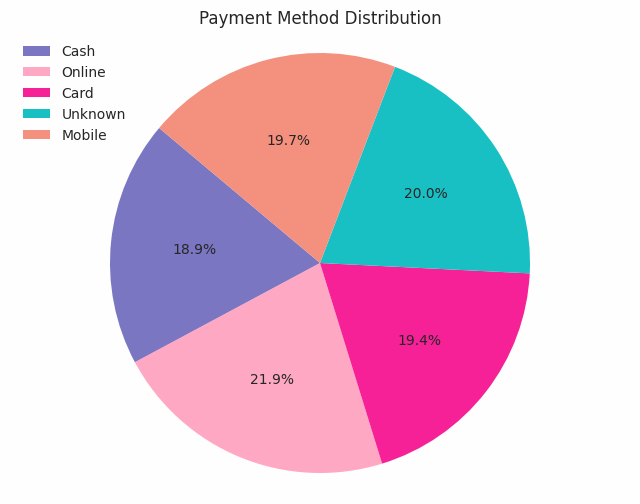

In [78]:
payment_methods = df['Payment_Method']

# Counting each payment method
method_counts = {}
for method in payment_methods:
    if method in method_counts:
        method_counts[method] += 1
    else:
        method_counts[method] = 1

# Preparing data for the pie chart
labels = method_counts.keys()
sizes = method_counts.values()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, autopct='%1.1f%%', startangle=140)
plt.title('Payment Method Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels=labels)

# Display the plot
plt.show()

## 2.3. Multivariate Analysis

### 2.3.1. Age x Gender

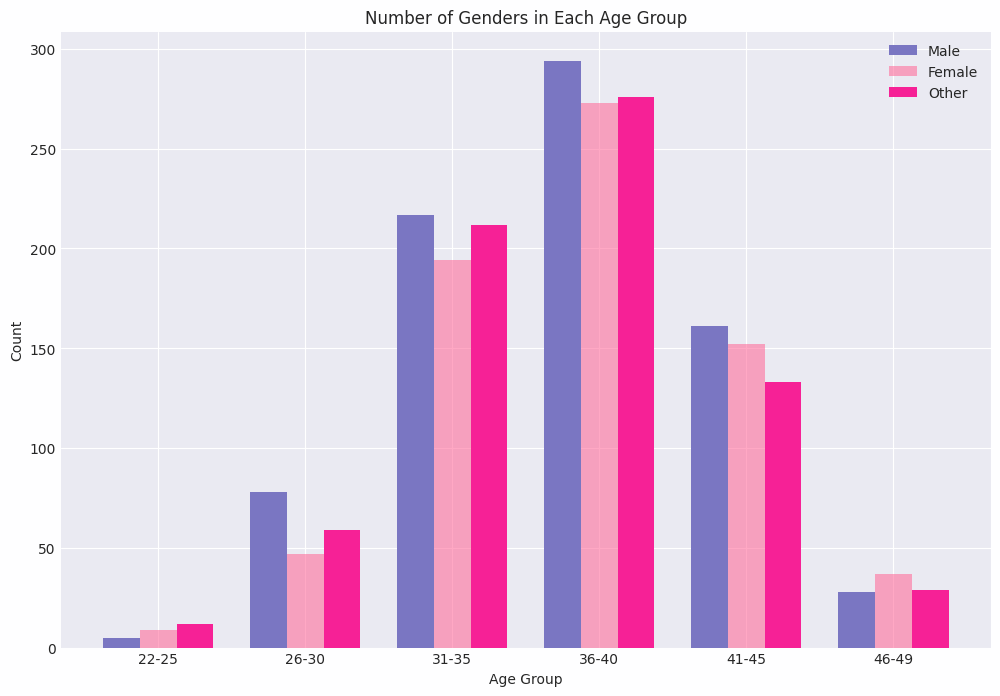

In [79]:
# Define bins for Age
bins = [22, 25, 30, 35, 40, 45, 49]

# Set labels for each bin
labels = ['22-25', '26-30', '31-35', '36-40', '41-45', '46-49']

# Create a pivot table for the number of genders in each age group
age_gender_counts = df.groupby([pd.cut(df['Age'], bins=bins, labels=labels, right=False), 'Gender']).size().unstack(fill_value=0)

# Get values from the pivot table
age_groups = age_gender_counts.index
male_counts = age_gender_counts['Male']
female_counts = age_gender_counts['Female']
other_counts = age_gender_counts['Other']

# Create a bar chart
bar_width = 0.25
index = np.arange(len(age_groups))

plt.figure(figsize=(12, 8))

plt.bar(index, male_counts, bar_width, label='Male')
plt.bar(index + bar_width, female_counts, bar_width, label='Female')
plt.bar(index + 2 * bar_width, other_counts, bar_width, label='Other')

# Set title and axis labels
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Number of Genders in Each Age Group')
plt.xticks(index + bar_width, age_groups)
plt.legend()

# Show the chart
plt.show()

### 2.3.2. Income x Total Expense

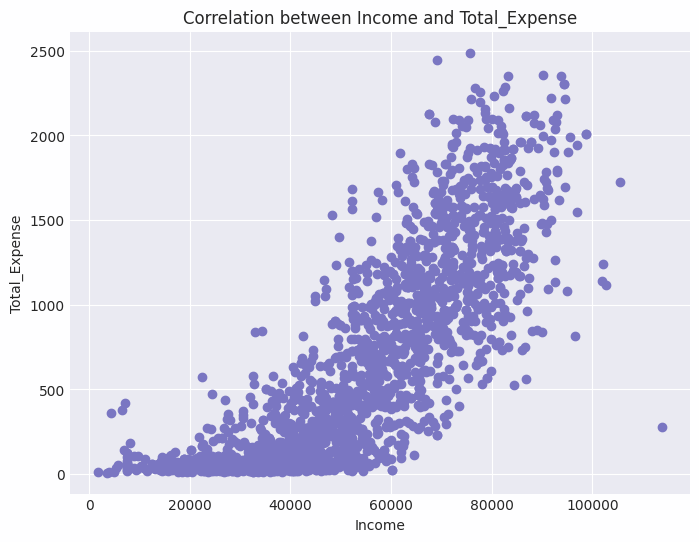

In [80]:
# Creating the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Income'], df['Total_Expense'])
plt.title('Correlation between Income and Total_Expense')
plt.xlabel('Income')
plt.ylabel('Total_Expense')
plt.grid(True)
plt.show()

### 2.3.3. Academic Level x Income x Expense

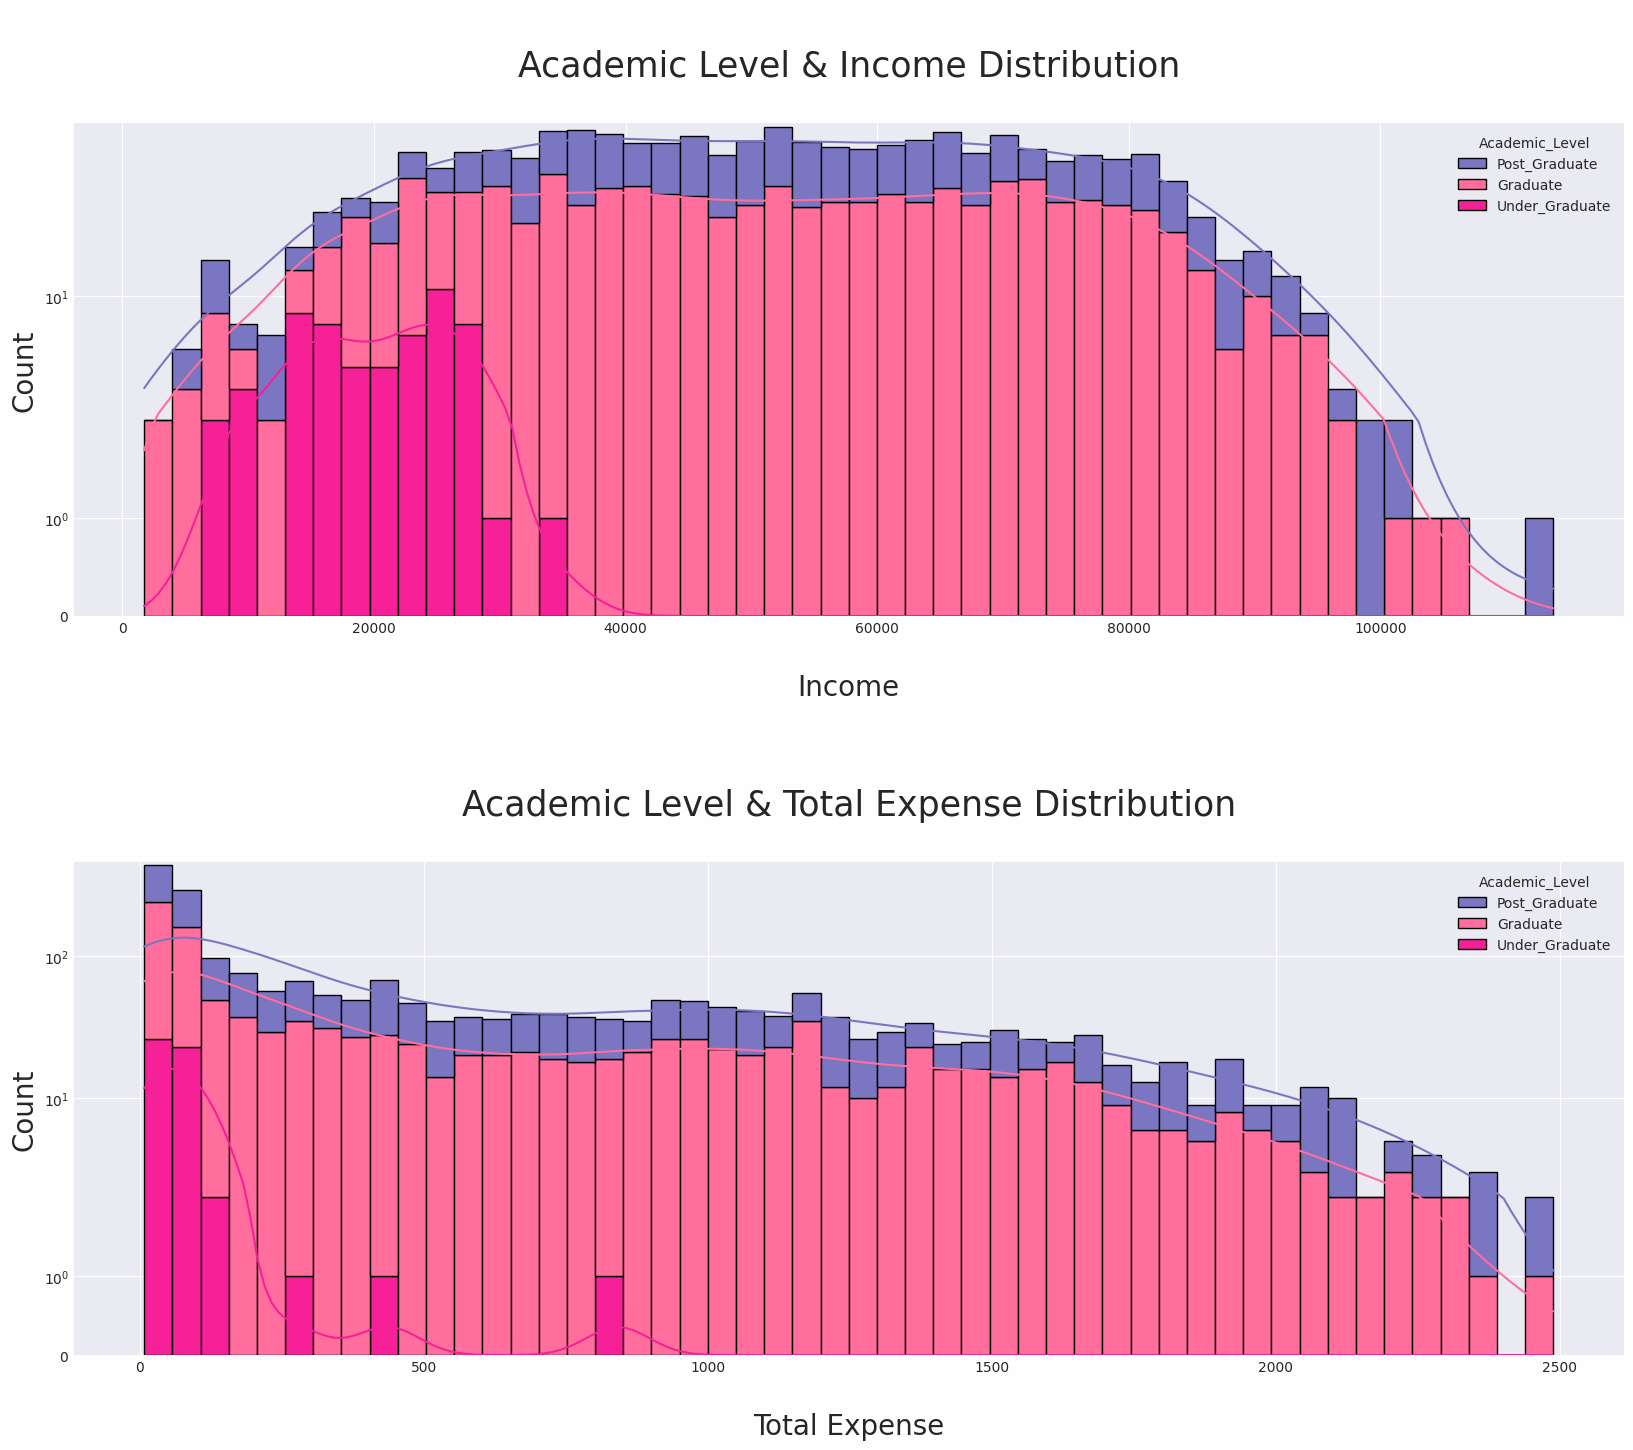

In [81]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(20, 16), sharex=False)

# Adjust the layout to increase the gap between subplots
fig.subplots_adjust(hspace=0.5)

# First plot: Income distribution
sns.histplot(data=df, x="Income", hue="Academic_Level", multiple="stack", ax=axes[0], kde=True, bins=50, alpha=1, fill=True, edgecolor="black")
axes[0].set_yscale("symlog")
axes[0].set_title("\nAcademic Level & Income Distribution\n", fontsize=25)
axes[0].set_ylabel("Count", fontsize=20)
axes[0].set_xlabel("\nIncome", fontsize=20)

# Second plot: Expense distribution
sns.histplot(data=df, x="Total_Expense", hue="Academic_Level", multiple="stack", ax=axes[1], kde=True, bins=50, alpha=1, fill=True, edgecolor="black")
axes[1].set_yscale("symlog")
axes[1].set_title("\nAcademic Level & Total Expense Distribution\n", fontsize=25)
axes[1].set_ylabel("Count", fontsize=20)
axes[1].set_xlabel("\nTotal Expense", fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

### 2.3.4. Marital Status x Average Expense

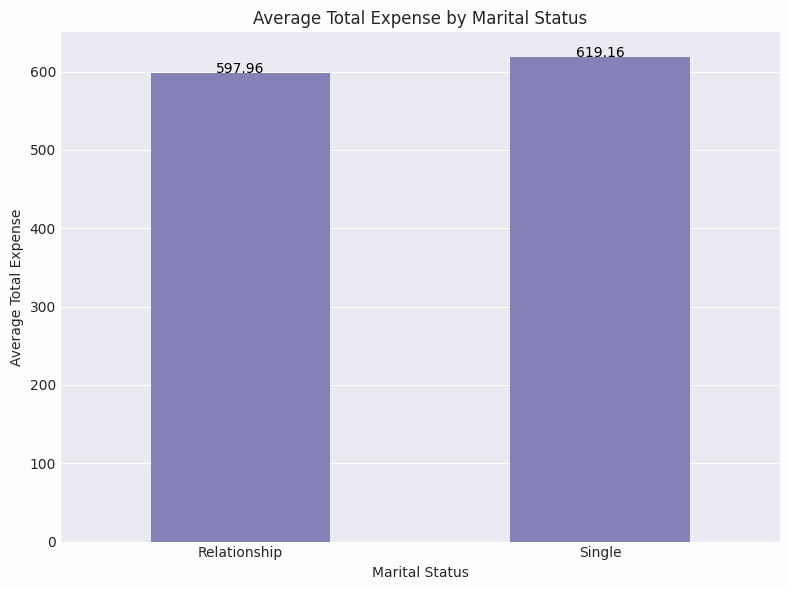

In [82]:
# Group by 'Marital_Status' and calculate mean 'Total_Expense'
average_expense = df.groupby('Marital_Status')['Total_Expense'].mean().reset_index()

# Visualization
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='Marital_Status', y='Total_Expense', data=average_expense, saturation=0.7, ci=None)
plt.title('Average Total Expense by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Total Expense')

# Adding the value labels on top of the bars
for index, row in average_expense.iterrows():
    bar_plot.text(index, row['Total_Expense'], round(row['Total_Expense'], 2), color='black', ha="center")


# Reduce the width of the bars
bar_width = 0.5
for patch in bar_plot.patches:
    current_width = patch.get_width()
    diff = current_width - bar_width
    patch.set_width(bar_width)
    patch.set_x(patch.get_x() + diff * .5)


plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### 2.3.5. Purchase Channel x Total Expense x Purchase Quantity

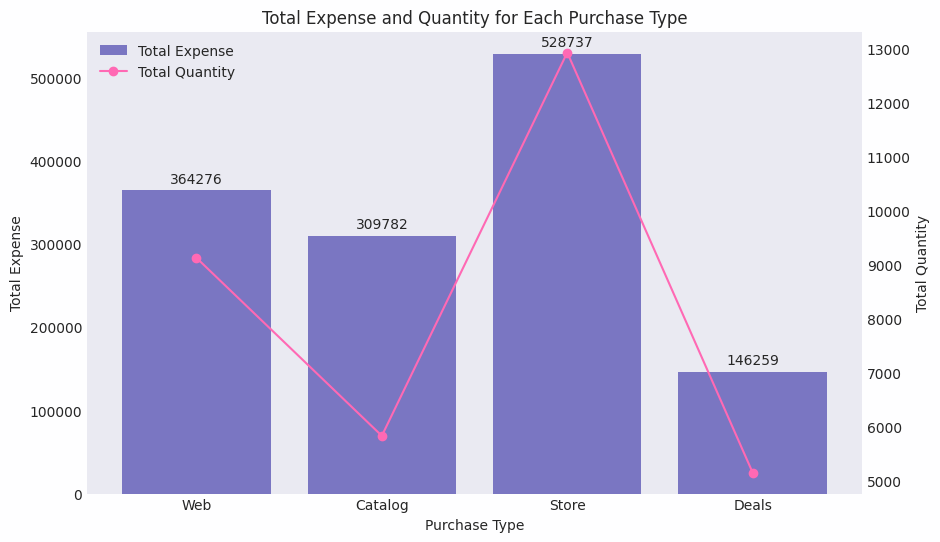

In [83]:
# Calculate total expense for each channel
total_expense_web = (df['Num_Web_Purchases'] * df['Total_Expense'] / df['Total_Purchase']).sum()
total_expense_catalog = (df['Num_Catalog_Purchases'] * df['Total_Expense'] / df['Total_Purchase']).sum()
total_expense_store = (df['Num_Store_Purchases'] * df['Total_Expense'] / df['Total_Purchase']).sum()
total_expense_deals = (df['Num_Deals_Purchases'] * df['Total_Expense'] / df['Total_Purchase']).sum()

# Calculate total quantity for each channel
total_quantity_web = df['Num_Web_Purchases'].sum()
total_quantity_catalog = df['Num_Catalog_Purchases'].sum()
total_quantity_store = df['Num_Store_Purchases'].sum()
total_quantity_deals = df['Num_Deals_Purchases'].sum()

# Create dataframe
plot_data = pd.DataFrame({
    'Purchase_Type': ['Web', 'Catalog', 'Store', 'Deals'],
    'Total_Expense': [total_expense_web, total_expense_catalog, total_expense_store, total_expense_deals],
    'Total_Quantity': [total_quantity_web, total_quantity_catalog, total_quantity_store, total_quantity_deals]
})

# Draw plot
fig, ax1 = plt.subplots(figsize=(10, 6))

bars = ax1.bar(plot_data['Purchase_Type'], plot_data['Total_Expense'], label='Total Expense')
ax1.set_xlabel('Purchase Type')
ax1.set_ylabel('Total Expense')
ax1.set_title('Total Expense and Quantity for Each Purchase Type')

ax1.grid(False)

ax2 = ax1.twinx()
line, = ax2.plot(plot_data['Purchase_Type'], plot_data['Total_Quantity'], color='hotpink', marker='o', label='Total Quantity')
ax2.set_ylabel('Total Quantity')

ax2.grid(False)

bars = bars.patches
for bar in bars:
    ax1.annotate(format(bar.get_height(), '.0f'), 
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + [line], labels + [labels2[0]], loc='upper left')

plt.show()

## 2.4. Correlation

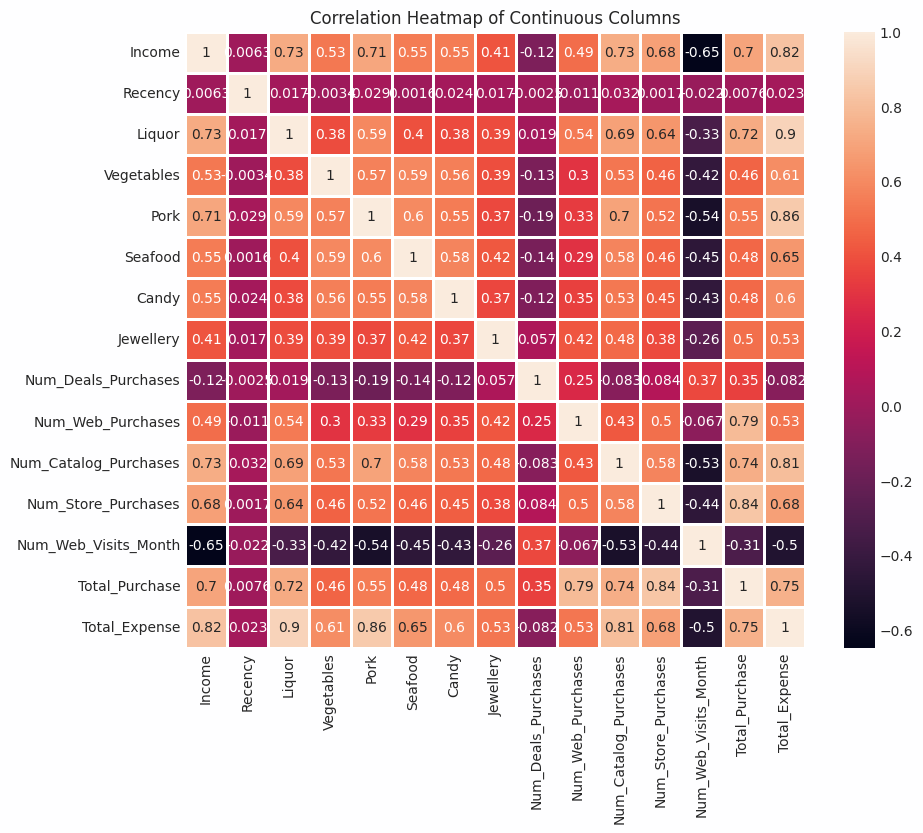

In [84]:
# Creating a DataFrame with only the continuous columns
continuous_df = df[continuous_columns]

# Calculate the correlation matrix
correlation_matrix = continuous_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, linewidths=1)
plt.title('Correlation Heatmap of Continuous Columns')
plt.show()

## 2.5. RFM

In [85]:
# Create RFM dataframe
rfm_df = df[['Recency', 'Total_Purchase', 'Total_Expense']]

In [86]:
# Calculate Recency_Score column
rfm_df['Recency_Score'] = rfm_df['Recency'].apply(lambda x: 100 - stats.percentileofscore(rfm_df['Recency'], x))

# Calculate Frequency_Score column
rfm_df['Frequency_Score'] = rfm_df['Total_Purchase'].apply(lambda x: stats.percentileofscore(rfm_df['Total_Purchase'], x))

# Calculate Monetary_Score column
rfm_df['Monetary_Score'] = rfm_df['Total_Expense'].apply(lambda x: stats.percentileofscore(rfm_df['Total_Expense'], x))

# Calculate RFM column from Recency_Score, Frequency_Score, and Monetary_Score columns
rfm_df['RFM'] = rfm_df[['Recency_Score', 'Frequency_Score', 'Monetary_Score']].sum(axis=1)

# Calculate RFM_Score column
rfm_df['RFM_Score'] = rfm_df['RFM'].apply(lambda x: stats.percentileofscore(rfm_df['RFM'], x))

In [87]:
rfm_df.head()

,Recency,Total_Purchase,Total_Expense,Recency_Score,Frequency_Score,Monetary_Score,RFM,RFM_Score
0,22,6,37.0,77.423698,15.350090,9.739677,102.513465,26.436266
1,56,24,1601.0,42.684022,86.647217,91.763914,221.095153,85.278276
2,30,16,303.0,68.424596,53.321364,45.870736,167.616697,57.854578
3,65,17,1171.0,33.999102,58.191203,79.869838,172.060144,60.053860
4,82,19,1164.0,16.988330,66.517056,79.690305,163.195691,55.251346


In [88]:
rfm_df['Income'] = df['Income']

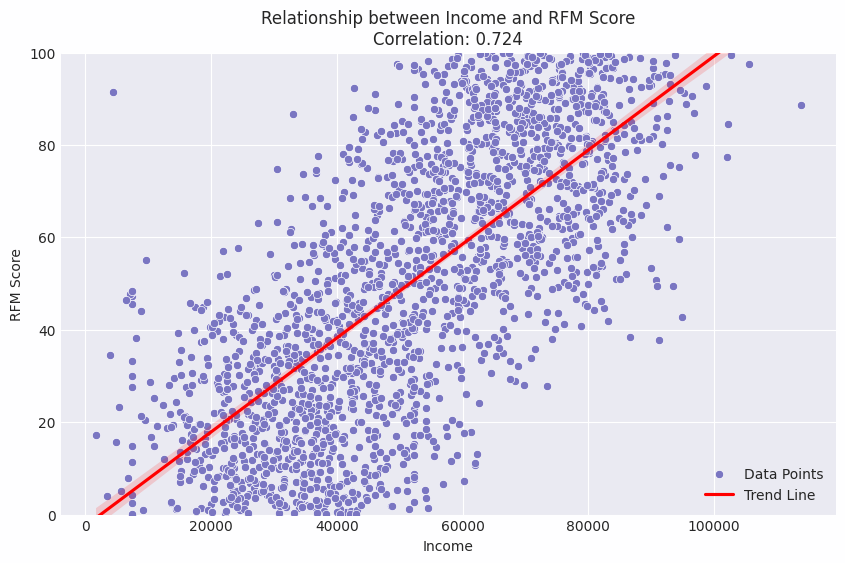

In [89]:
correlation = round(rfm_df['RFM_Score'].corr(rfm_df['Income']), 4)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x="Income", y="RFM_Score")
sns.regplot(data=rfm_df, x="Income", y="RFM_Score", scatter=False, color='red')

plt.title(f"Relationship between Income and RFM Score\nCorrelation: {correlation}")
plt.xlabel("Income")
plt.ylabel("RFM Score")
plt.ylim(0, 100)

plt.legend(['Data Points', 'Trend Line'])
plt.show()

In [90]:
correlation = round(rfm_df['RFM_Score'].corr(rfm_df['Income']), 4)
print(f'Correlation between RFM_Score and Income: {correlation}')

Correlation between RFM_Score and Income: 0.724


In [91]:
df.to_csv('dataset_cleaned.csv')

In [92]:
csv_buffer = df.to_csv(index=False).encode()

# Define the HDFS path where you want to save the file
hdfs_output_path = '/user/root/output/dataset_cleaned.csv'

# Write the CSV data to HDFS
with client.write(hdfs_output_path, overwrite=True) as writer:
    writer.write(csv_buffer)

print(f"File has been saved to HDFS at: {hdfs_output_path}")

File has been saved to HDFS at: /user/root/output/dataset_cleaned.csv
